# **Dynamic Pricing**

### **1. Dataset**


In [1]:
pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


##### 1.1 Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

##### 1.2 Load Dataset

In [4]:
df = pd.read_csv('/Users/StarLi/Downloads/pmg-more-than-50-products.csv')
df

,product_id,product_matching_group_id,brand_name,name,company_product_id,category,standard_size_unit,standard_size_value,collected_date,store_id,store,company,postal,city,province,regular_price,current_price,is_onsale,discount_type_id
0,915063635,9429,kashi,"cinnamon harvest cereal, oragnic promise",902429293,pantry,g,460.0,2023-12-02 04:11:16.528,4036,Alimentation Patrick Boisclair,Metro,H1S 1J7,Montreal,QC,0.00,7.49,1,0
1,865232184,12017,crave,frozen cheesy loaded potatoes with angus beef ...,852597857,frozen,g,284.0,2023-12-02 04:11:08.209,4036,Alimentation Patrick Boisclair,Metro,H1S 1J7,Montreal,QC,5.99,4.99,1,0
2,865233421,6055,lea & perrins,worcestershire sauce,852599094,pantry,ml,142.0,2023-12-02 04:11:13.608,4036,Alimentation Patrick Boisclair,Metro,H1S 1J7,Montreal,QC,3.49,2.99,1,0
3,93136561,22716,yoplait,"raspberry flavoured 1% drinkable yogurt, yop",93127867,dairy,ml,200.0,2023-12-02 04:11:04.476,4036,Alimentation Patrick Boisclair,Metro,H1S 1J7,Montreal,QC,420.00,5.00,1,0
4,865228773,9001,maxwell house,original roast instant coffee,852594446,drinks,g,150.0,2023-12-02 04:10:50.488,4036,Alimentation Patrick Boisclair,Metro,H1S 1J7,Montreal,QC,0.00,5.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34023433,410388,9429,kashi,organic cinnamon harvest cereal,307089,pantry,g,460.0,2020-05-25 07:42:50.427,907,Commercial Street,Atlantic Superstore,B4N 3E4,New Minas,NS,5.79,5.00,1,0
34023434,409562,1508,miracle whip,original spread,306263,pantry,ml,650.0,2020-05-25 07:42:50.427,907,Commercial Street,Atlantic Superstore,B4N 3E4,New Minas,NS,0.00,5.29,0,0
34023435,414469,17450,kraft,guinness beer blend ggq sauce,311087,pantry,ml,425.0,2020-05-25 07:42:50.427,907,Commercial Street,Atlantic Superstore,B4N 3E4,New Minas,NS,2.99,1.99,1,0
34023436,409922,5216,quaker,"crispy minis rice cakes, original",306622,pantry,g,127.0,2020-05-25 07:42:50.427,907,Commercial Street,Atlantic Superstore,B4N 3E4,New Minas,NS,2.69,2.33,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34023438 entries, 0 to 34023437
Data columns (total 19 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   product_id                 int64  
 1   product_matching_group_id  int64  
 2   brand_name                 object 
 3   name                       object 
 4   company_product_id         int64  
 5   category                   object 
 6   standard_size_unit         object 
 7   standard_size_value        float64
 8   collected_date             object 
 9   store_id                   int64  
 10  store                      object 
 11  company                    object 
 12  postal                     object 
 13  city                       object 
 14  province                   object 
 15  regular_price              float64
 16  current_price              float64
 17  is_onsale                  int64  
 18  discount_type_id           int64  
dtypes: float64(3), int64(6), object(10)
memo

In [6]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_id,34023438.0,NaN,NaN,NaN,163238083.906821,252140536.851875,884.0,54909422.0,55245104.0,69593853.0,9900441477.0
product_matching_group_id,34023438.0,NaN,NaN,NaN,9197.929632,8034.662082,34.0,1039.0,6960.0,16301.0,23595.0
brand_name,26972934,257,kraft,1788146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,34023438,1355,miracle whip original spread,278456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_product_id,34023438.0,NaN,NaN,NaN,148981034.585095,249698469.012265,884.0,42106323.0,42406172.0,56891226.0,1040495997.0
category,34023438,14,pantry,15217209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
standard_size_unit,27956669,32,g,16300145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
standard_size_value,33996026.0,NaN,NaN,NaN,715.818426,2114.671025,0.0,1.0,227.0,473.0,453995.914
collected_date,34023438,12071451,2020-10-01 05:27:01.039,40216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_id,34023438.0,NaN,NaN,NaN,2059.90819,1943.81103,1.0,885.0,1577.0,2219.0,10723.0


### **2. Exploratory Data Analysis (EDA)**

##### 2.1 Data Cleaning

##### 2.1.1 Deal with Duplicates

In [7]:
duplicates_counts = df.duplicated().sum()
print(duplicates_counts)

3761425


This dataset has 3,761,425 duplicates which can drop it.

In [8]:
df = df.drop_duplicates()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30262013 entries, 0 to 34023437
Data columns (total 19 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   product_id                 int64  
 1   product_matching_group_id  int64  
 2   brand_name                 object 
 3   name                       object 
 4   company_product_id         int64  
 5   category                   object 
 6   standard_size_unit         object 
 7   standard_size_value        float64
 8   collected_date             object 
 9   store_id                   int64  
 10  store                      object 
 11  company                    object 
 12  postal                     object 
 13  city                       object 
 14  province                   object 
 15  regular_price              float64
 16  current_price              float64
 17  is_onsale                  int64  
 18  discount_type_id           int64  
dtypes: float64(3), int64(6), object(10)
memory us

The original dataset has 34,023,438 entries, after dropping duplicates, the new dataset has 30,262,013 entries.

##### 2.1.2 Deal with Missing Values

In [10]:
null_counts = df.isnull().sum()
print(null_counts)

product_id                         0
product_matching_group_id          0
brand_name                   6273295
name                               0
company_product_id                 0
category                           0
standard_size_unit           5333469
standard_size_value            25230
collected_date                     0
store_id                           0
store                              0
company                            0
postal                         20781
city                               0
province                       26424
regular_price                      0
current_price                      0
is_onsale                          0
discount_type_id                   0
dtype: int64


In [11]:
drop_maximum = 30262013 * 0.1 
print(f'drop_maximum: {drop_maximum}')


drop_maximum: 3026201.3000000003


The maximum amount that can drop is 3,026,201.

brand_name and standard_size_unit have null values which is more than 10% of the total data (drop_maximum), need to fill in.

standard_size_value, postal and province have null values which is less than the 10% of the total data (drop_maximum), simply drop them.

In [12]:
df = df.dropna(subset=['standard_size_value', 'postal', 'province'])

In [13]:
null_counts = df.isnull().sum()
print(null_counts)

product_id                         0
product_matching_group_id          0
brand_name                   6240795
name                               0
company_product_id                 0
category                           0
standard_size_unit           5308199
standard_size_value                0
collected_date                     0
store_id                           0
store                              0
company                            0
postal                             0
city                               0
province                           0
regular_price                      0
current_price                      0
is_onsale                          0
discount_type_id                   0
dtype: int64


After dropping the rows with the nulls values in those three columns, there are still a large of null values in 'brand_name' and "standard_size_unit'.

Try to find the relationship between columns to fill in the null values in these two columns.

In [14]:
product_id_grouped = df.groupby('product_id')['brand_name'].nunique()
non_unique_mappings = product_id_grouped[product_id_grouped > 1]
print(product_id_grouped)
print(non_unique_mappings)


product_id
884           1
1882          1
2014          1
2099          1
2569          1
             ..
1036893795    0
1036896800    0
1036896990    0
1053130352    0
9900441477    1
Name: brand_name, Length: 8199, dtype: int64
Series([], Name: brand_name, dtype: int64)


Each 'product_id' is consistently associated with a single brand, or no brand at all because the brand_name is missing.

In [15]:
product_matching_group_grouped = df.groupby('product_matching_group_id')['brand_name'].nunique()
non_unique_mappings = product_matching_group_grouped[product_matching_group_grouped > 1]
print(product_matching_group_grouped)
print(non_unique_mappings)

product_matching_group_id
34       1
40       4
49       1
59       5
67       1
        ..
23557    2
23582    1
23583    2
23585    0
23595    2
Name: brand_name, Length: 173, dtype: int64
product_matching_group_id
40       4
59       5
99       4
132      2
166      3
        ..
23507    2
23544    4
23557    2
23583    2
23595    2
Name: brand_name, Length: 102, dtype: int64


There is more than one unique brand name for a single 'product_matching_group_id'.

Step 1: Find out the mode of the 'brand_name' to fill in the null values if have 'brand_name' record in the same 'product_matching_group_id'.

Step 2: Fill in the null values with 'Unknown' for those don't have any records in the same 'product_matching_group_id'.

Before we fill in, make a copy of the original dataset.

In [16]:
original_df = df.copy()

In [17]:
most_common_brand = df.groupby('product_matching_group_id')['brand_name'].agg(
    lambda x: x.mode()[0] if not x.mode().empty else np.random.choice(x.dropna().unique()) if not x.dropna().empty else np.nan
)

brand_mapping = most_common_brand.to_dict()

df.loc[df['brand_name'].isnull(), 'brand_name'] = df['product_matching_group_id'].map(brand_mapping)

print(df['brand_name'].isnull().sum())

641723


Before fill in the null_values with the mode records in the 'brand_name', there are 6,240,795 null values, now only 641,723 null values left.

Fill these with 'Unknown' values.

In [18]:
df['brand_name'].fillna('Unknown', inplace=True)

For column 'standard_size_unit', fill in the null values in the same way.

First, try to find out the relationship with other columns.

In [19]:
product_id_grouped_1 = df.groupby('product_id')['standard_size_unit'].nunique()
non_unique_mappings = product_id_grouped_1[product_id_grouped_1 > 1]
print(product_id_grouped_1)
print(non_unique_mappings)


product_id
884           0
1882          1
2014          1
2099          1
2569          1
             ..
1036893795    1
1036896800    0
1036896990    1
1053130352    1
9900441477    1
Name: standard_size_unit, Length: 8199, dtype: int64
Series([], Name: standard_size_unit, dtype: int64)


In [20]:
product_matching_group_grouped_1 = df.groupby('product_matching_group_id')['standard_size_unit'].nunique()
non_unique_mappings = product_matching_group_grouped_1[product_matching_group_grouped_1 > 1]
print(product_matching_group_grouped_1)
print(non_unique_mappings)

product_matching_group_id
34       1
40       4
49       4
59       4
67       2
        ..
23557    3
23582    2
23583    3
23585    2
23595    1
Name: standard_size_unit, Length: 173, dtype: int64
product_matching_group_id
40       4
49       4
59       4
67       2
99       6
        ..
23550    3
23557    3
23582    2
23583    3
23585    2
Name: standard_size_unit, Length: 86, dtype: int64


Before we fill in, make a copy of the original dataset.

In [21]:
original_df_1 = df.copy()

Find out the mode of the 'standard_size_unit' to fill in the null values if have 'standard_size_unit' record in the same 'product_matching_group_id'.

In [22]:
most_common_standard_size_unit = df.groupby('product_matching_group_id')['standard_size_unit'].agg(
    lambda x: x.mode()[0] if not x.mode().empty else np.random.choice(x.dropna().unique()) if not x.dropna().empty else np.nan
)

standard_size_unit_mapping = most_common_standard_size_unit .to_dict()

df.loc[df['standard_size_unit'].isnull(), 'standard_size_unit'] = df['product_matching_group_id'].map(standard_size_unit_mapping)

print(df['standard_size_unit'].isnull().sum())

4848


In [23]:
null_counts = df.isnull().sum()
print(null_counts)

product_id                      0
product_matching_group_id       0
brand_name                      0
name                            0
company_product_id              0
category                        0
standard_size_unit           4848
standard_size_value             0
collected_date                  0
store_id                        0
store                           0
company                         0
postal                          0
city                            0
province                        0
regular_price                   0
current_price                   0
is_onsale                       0
discount_type_id                0
dtype: int64


Now only 4848 null values left in the column 'standard_size_unit', simply drop it.

In [24]:
df = df.dropna(subset=['standard_size_unit'])

In [25]:
total_null_counts = df.isnull().sum().sum()
print(total_null_counts)

0


Now there are no null values in this dataset.

##### 2.1.3 Deal with Inappropriate Range

In [26]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_id,30184884.0,NaN,NaN,NaN,163859124.350549,252227662.293733,1882.0,54908787.0,55208636.0,69593853.0,9900441477.0
product_matching_group_id,30184884.0,NaN,NaN,NaN,9203.045834,8039.874993,34.0,1039.0,6960.0,16301.0,23595.0
brand_name,30184884,256,kraft,1592291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,30184884,1301,miracle whip original spread,247027,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_product_id,30184884.0,NaN,NaN,NaN,149401030.640054,249709047.737807,1882.0,42106235.0,42378044.0,56890563.0,1040495997.0
category,30184884,14,pantry,13490666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
standard_size_unit,30184884,29,g,17214330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
standard_size_value,30184884.0,NaN,NaN,NaN,718.717391,2128.18858,0.0,1.0,227.0,475.0,453995.914
collected_date,30184884,12065606,2020-10-01 05:27:01.039,34929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_id,30184884.0,NaN,NaN,NaN,2016.54417,1870.144777,1.0,872.0,1565.0,2207.0,10723.0


The column 'current_price' has the minimum value which is less than zero, it doesn't make sense, need to keep the dataset that the price is more than zero.

In [27]:
counts_current_price = (df['current_price'] <= 0).sum()
print(counts_current_price)

866679


In [28]:
df = df[df['current_price'] > 0]

In [29]:
df

,product_id,product_matching_group_id,brand_name,name,company_product_id,category,standard_size_unit,standard_size_value,collected_date,store_id,store,company,postal,city,province,regular_price,current_price,is_onsale,discount_type_id
0,915063635,9429,kashi,"cinnamon harvest cereal, oragnic promise",902429293,pantry,g,460.0,2023-12-02 04:11:16.528,4036,Alimentation Patrick Boisclair,Metro,H1S 1J7,Montreal,QC,0.00,7.49,1,0
1,865232184,12017,crave,frozen cheesy loaded potatoes with angus beef ...,852597857,frozen,g,284.0,2023-12-02 04:11:08.209,4036,Alimentation Patrick Boisclair,Metro,H1S 1J7,Montreal,QC,5.99,4.99,1,0
2,865233421,6055,lea & perrins,worcestershire sauce,852599094,pantry,ml,142.0,2023-12-02 04:11:13.608,4036,Alimentation Patrick Boisclair,Metro,H1S 1J7,Montreal,QC,3.49,2.99,1,0
3,93136561,22716,yoplait,"raspberry flavoured 1% drinkable yogurt, yop",93127867,dairy,ml,200.0,2023-12-02 04:11:04.476,4036,Alimentation Patrick Boisclair,Metro,H1S 1J7,Montreal,QC,420.00,5.00,1,0
4,865228773,9001,maxwell house,original roast instant coffee,852594446,drinks,g,150.0,2023-12-02 04:10:50.488,4036,Alimentation Patrick Boisclair,Metro,H1S 1J7,Montreal,QC,0.00,5.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34023433,410388,9429,kashi,organic cinnamon harvest cereal,307089,pantry,g,460.0,2020-05-25 07:42:50.427,907,Commercial Street,Atlantic Superstore,B4N 3E4,New Minas,NS,5.79,5.00,1,0
34023434,409562,1508,miracle whip,original spread,306263,pantry,ml,650.0,2020-05-25 07:42:50.427,907,Commercial Street,Atlantic Superstore,B4N 3E4,New Minas,NS,0.00,5.29,0,0
34023435,414469,17450,kraft,guinness beer blend ggq sauce,311087,pantry,ml,425.0,2020-05-25 07:42:50.427,907,Commercial Street,Atlantic Superstore,B4N 3E4,New Minas,NS,2.99,1.99,1,0
34023436,409922,5216,quaker,"crispy minis rice cakes, original",306622,pantry,g,127.0,2020-05-25 07:42:50.427,907,Commercial Street,Atlantic Superstore,B4N 3E4,New Minas,NS,2.69,2.33,1,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29318205 entries, 0 to 34023437
Data columns (total 19 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   product_id                 int64  
 1   product_matching_group_id  int64  
 2   brand_name                 object 
 3   name                       object 
 4   company_product_id         int64  
 5   category                   object 
 6   standard_size_unit         object 
 7   standard_size_value        float64
 8   collected_date             object 
 9   store_id                   int64  
 10  store                      object 
 11  company                    object 
 12  postal                     object 
 13  city                       object 
 14  province                   object 
 15  regular_price              float64
 16  current_price              float64
 17  is_onsale                  int64  
 18  discount_type_id           int64  
dtypes: float64(3), int64(6), object(10)
memory us

##### 2.1.4 Deal with Incorrect DataType

Convert the 'collected_date' column from object datatype to datetime datatype.

In [31]:
df = df.copy()

In [32]:
df['collected_date'] = pd.to_datetime(df['collected_date'])

##### 2.1.5 Create Meaningful Columns for Further Analysis

Create Year, Month and Week Columns

In [33]:
df['Year'] = df['collected_date'].dt.year
df['Month'] = df['collected_date'].dt.month
df['Week'] = df['collected_date'].dt.isocalendar().week


In [34]:
df.head(2000000)

,product_id,product_matching_group_id,brand_name,name,company_product_id,category,standard_size_unit,standard_size_value,collected_date,store_id,...,postal,city,province,regular_price,current_price,is_onsale,discount_type_id,Year,Month,Week
0,915063635,9429,kashi,"cinnamon harvest cereal, oragnic promise",902429293,pantry,g,460.00,2023-12-02 04:11:16.528,4036,...,H1S 1J7,Montreal,QC,0.00,7.49,1,0,2023,12,48
1,865232184,12017,crave,frozen cheesy loaded potatoes with angus beef ...,852597857,frozen,g,284.00,2023-12-02 04:11:08.209,4036,...,H1S 1J7,Montreal,QC,5.99,4.99,1,0,2023,12,48
2,865233421,6055,lea & perrins,worcestershire sauce,852599094,pantry,ml,142.00,2023-12-02 04:11:13.608,4036,...,H1S 1J7,Montreal,QC,3.49,2.99,1,0,2023,12,48
3,93136561,22716,yoplait,"raspberry flavoured 1% drinkable yogurt, yop",93127867,dairy,ml,200.00,2023-12-02 04:11:04.476,4036,...,H1S 1J7,Montreal,QC,420.00,5.00,1,0,2023,12,48
4,865228773,9001,maxwell house,original roast instant coffee,852594446,drinks,g,150.00,2023-12-02 04:10:50.488,4036,...,H1S 1J7,Montreal,QC,0.00,5.99,1,0,2023,12,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423488,7260,15988,starbucks,pike place ground coffee 340 grams,7260,pantry,g,340.00,2023-08-30 18:34:42.790,441,...,T9H4N6,Fort Mcmurray,AB,0.00,8.99,1,0,2023,8,35
2423489,7469,16301,v8,vegetable cocktail low sodium,7470,pantry,litre,1.89,2023-08-30 18:34:56.659,441,...,T9H4N6,Fort Mcmurray,AB,0.00,6.79,0,0,2023,8,35
2423490,7260,15988,starbucks,pike place ground coffee 340 grams,7260,pantry,g,340.00,2023-08-30 18:45:09.432,10003,...,T4P4P6,Camrose,AB,0.00,8.99,1,0,2023,8,35
2423491,26774304,22990,camino,organic cocoa powder dutch processed,13971854,pantry,g,224.00,2023-08-30 18:45:32.478,10003,...,T4P4P6,Camrose,AB,0.00,7.59,1,0,2023,8,35


In [35]:
df.nunique()

product_id                       7996
product_matching_group_id         169
brand_name                        255
name                             1297
company_product_id               8294
category                           14
standard_size_unit                 26
standard_size_value               305
collected_date               12029673
store_id                         3929
store                            3052
company                            33
postal                           2879
city                             1002
province                           24
regular_price                     792
current_price                    1925
is_onsale                           2
discount_type_id                    1
Year                                5
Month                              12
Week                               53
dtype: int64

##### 2.2 Data Visualization

##### 2.2.1 Numerical Variables

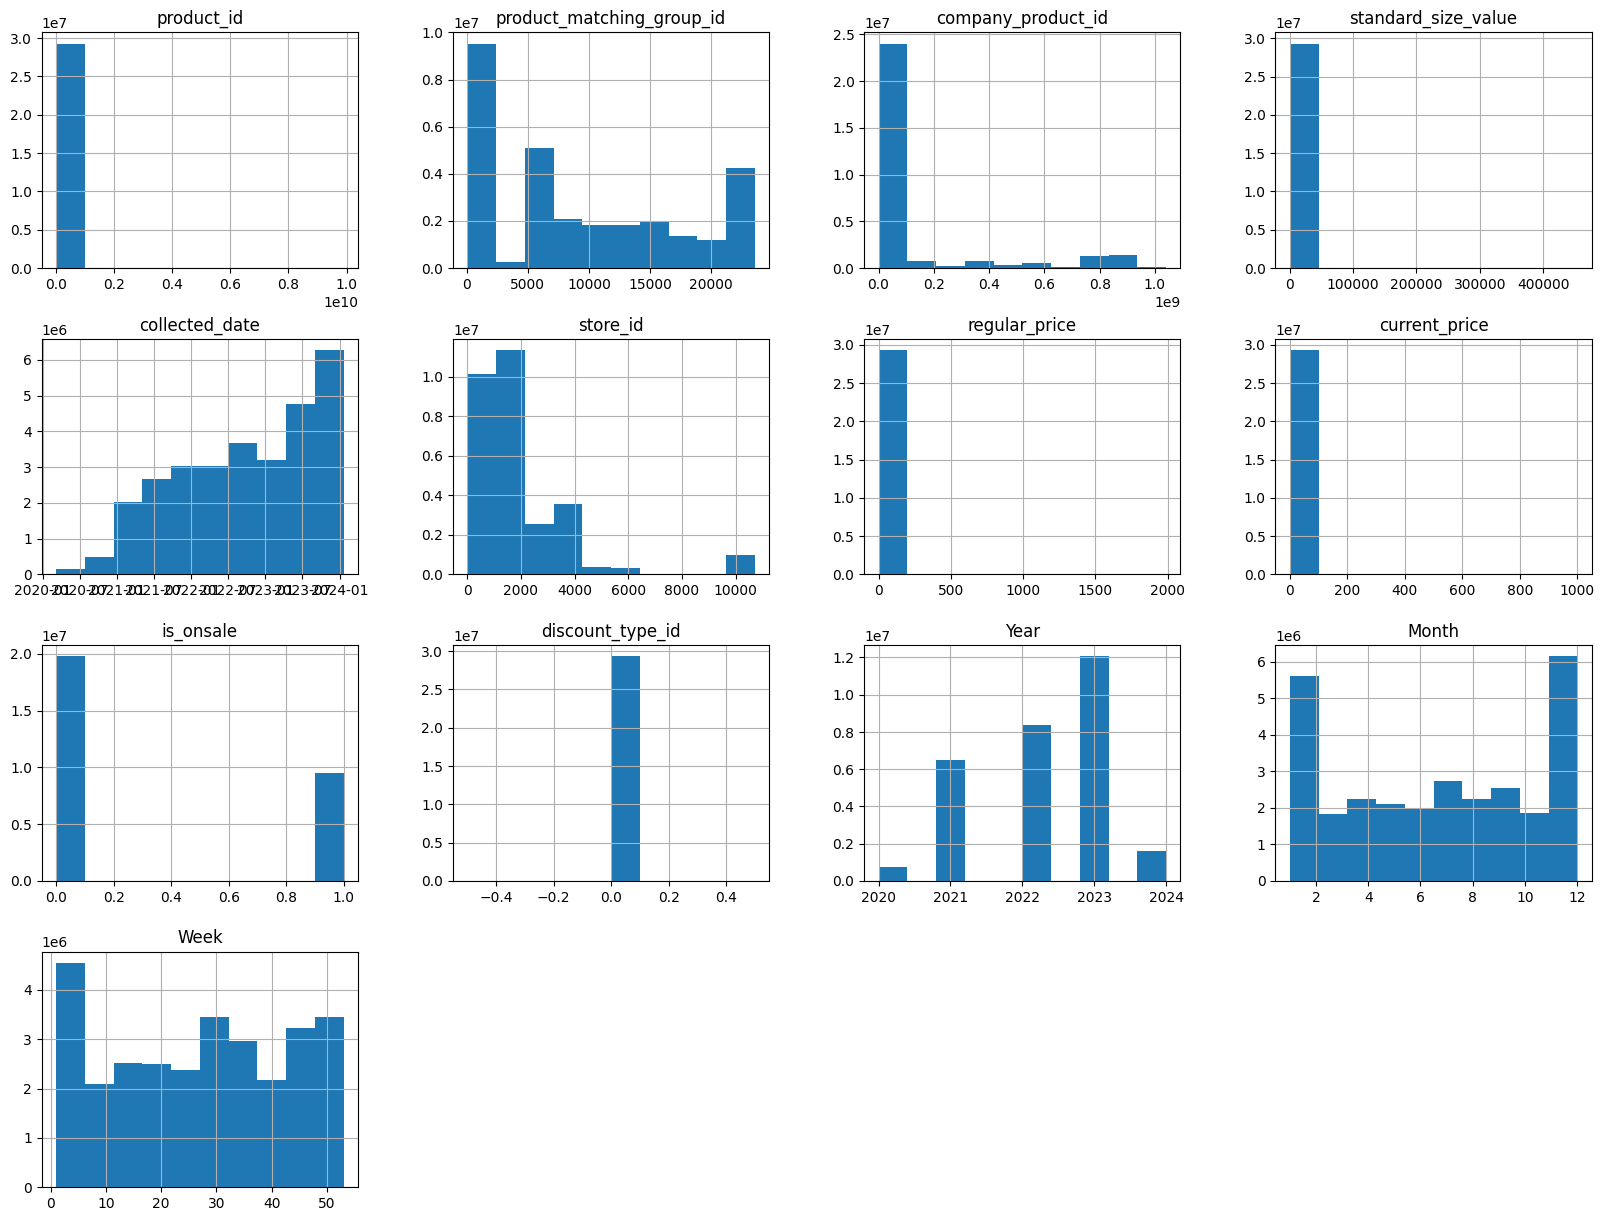

In [36]:
df.hist(figsize=(20,15))
plt.show()

**Conclusion:**

**collected_date:**
 Data collection has been increasing over time from 2020 to 2024, with some fluctuations.

**is_onsale:** 
This histogram shows that there are significantly more instances where products are not on sale (0) compared to when they are on sale (1).

**Year:** 
Data from the years 2020 to 2024 is displayed, with 2020 and 2023 having the most data points, suggesting more activity or data collected in these years.

**Month:**
The data shows seasonal trends or monthly variations with peaks at certain times of the year, indicating perhaps seasonal sales or data collection trends.

**Week:**
The data is spread across different weeks, with some weeks having more data points than others, which may indicate weekly sales cycles or reporting periods.


##### 2.2.2 Boxplot to Check Outliers

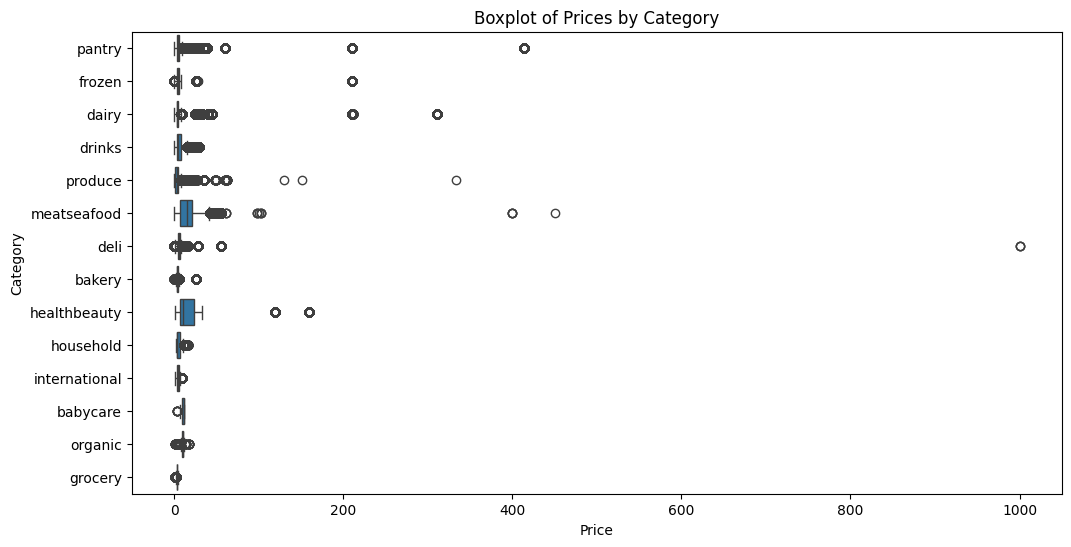

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='current_price', y='category', data=df)
plt.title('Boxplot of Prices by Category')
plt.xlabel('Price')
plt.ylabel('Category')
plt.show()

To ensure our analysis accurate, we're utilizing boxplots to visualize the distribution of prices across different product categories in our dataset. In this boxplot, we could find out different cateogries has different range of prices and outliers, so next step our purpose is to remove these outliers by category.

##### 2.2.3 Deal with Outliers for Column ['current_price'] by Category

In [38]:
def remove_outliers(df, column, category_col):

    clean_df = pd.DataFrame()
    
    for category in df[category_col].unique():

        cat_df = df[df[category_col] == category]
        
        Q1 = cat_df[column].quantile(0.25)
        Q3 = cat_df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        filtered_cat_df = cat_df[(cat_df[column] >= lower_bound) & (cat_df[column] <= upper_bound)]
        
        clean_df = pd.concat([clean_df, filtered_cat_df], axis=0)
    
    return clean_df

cleaned_df = remove_outliers(df, 'current_price', 'category')

print(cleaned_df)


          product_id  product_matching_group_id     brand_name  \
0          915063635                       9429          kashi   
2          865233421                       6055  lea & perrins   
7          865233326                        339       tostitos   
12         865233455                        634    bonne maman   
13         865233421                       6055  lea & perrins   
...              ...                        ...            ...   
34021633      258022                       1473      stouffers   
34021704       38239                       5355      cavendish   
34021719      258022                       1473      stouffers   
34021749       96288                       5355      cavendish   
34021779       96288                       5355      cavendish   

                                                    name  company_product_id  \
0               cinnamon harvest cereal, oragnic promise           902429293   
2                                   worcestersh

This function is to identify the typical range of prices in each category by calculating the Interquartile Range (IQR), which is the range between the first quartile (25th percentile) and the third quartile (75th percentile).

Then define outliers as any price that lies more than 1.5 times the IQR below the first quartile or above the third quartile which is a standard practice for outlier detection.

Finally, Filtering out these outliers from our dataset to prevent them from skewing our analysis.

In [39]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28126023 entries, 0 to 34021779
Data columns (total 22 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   product_id                 int64         
 1   product_matching_group_id  int64         
 2   brand_name                 object        
 3   name                       object        
 4   company_product_id         int64         
 5   category                   object        
 6   standard_size_unit         object        
 7   standard_size_value        float64       
 8   collected_date             datetime64[ns]
 9   store_id                   int64         
 10  store                      object        
 11  company                    object        
 12  postal                     object        
 13  city                       object        
 14  province                   object        
 15  regular_price              float64       
 16  current_price              float64     

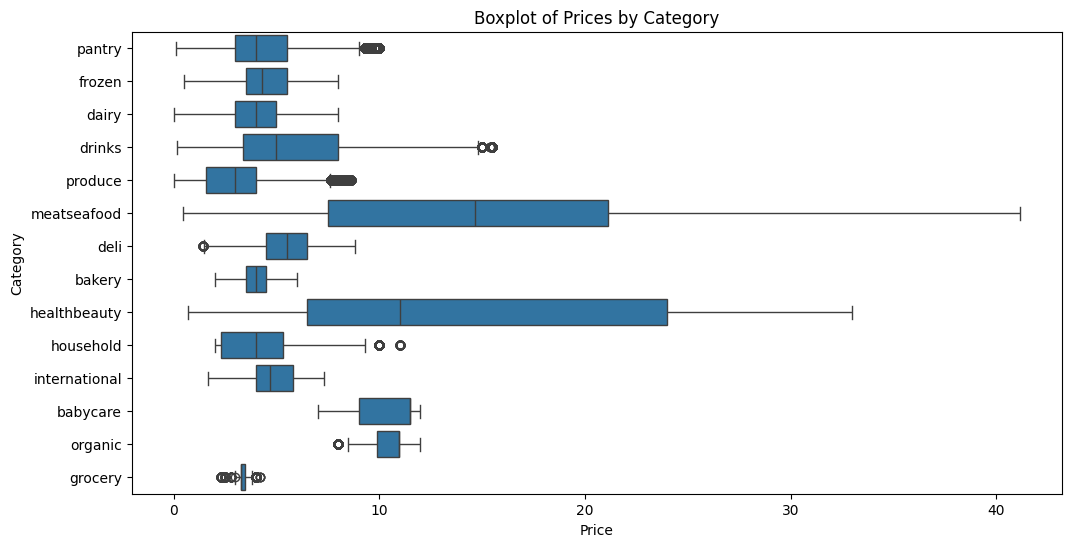

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='current_price', y='category', data=cleaned_df)
plt.title('Boxplot of Prices by Category')
plt.xlabel('Price')
plt.ylabel('Category')
plt.show()

Now this is the distribution of prices across different product categories after the removal of outliers.

Pantry: Exhibits a wide range of prices with a number of outliers, indicating that while many pantry items are moderately priced, there are a few with significantly higher prices.

Produce: Shows a wide interquartile range with multiple outliers on the higher end, indicating a large variation in product prices within this category.

Meat/Seafood: Features one of the longest whiskers, especially on the higher end, which denotes a broad range of prices, and the presence of outliers suggests some items are priced much higher than others.

Health/Beauty: While the median price is moderate, this category has a few outliers, indicating that there are some items with prices that are much higher than the average.

Grocery: Has the lowest median price and a very narrow interquartile range, indicating that grocery items are generally low-priced with very little variation in price.

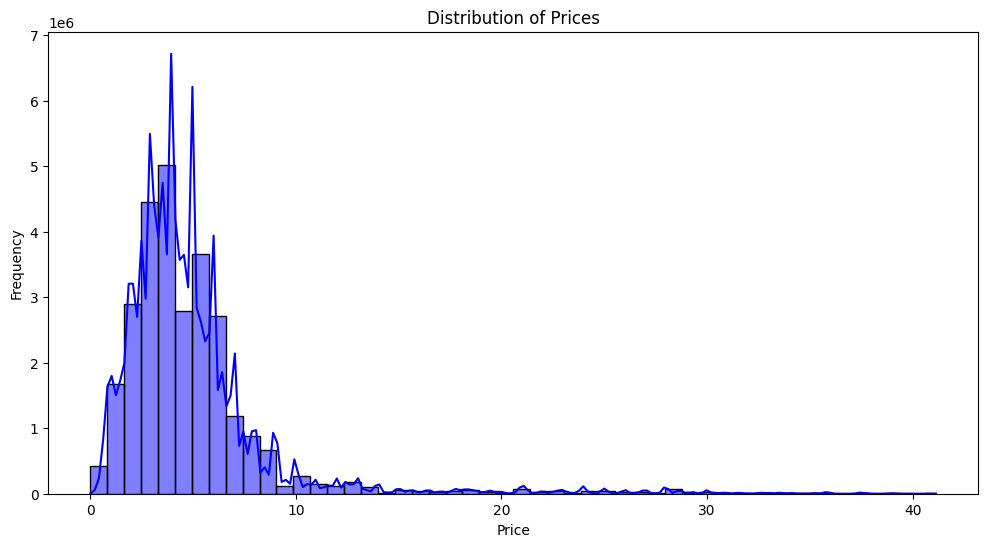

In [41]:
# Histogram and Kernel Density Plot
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_df['current_price'], kde=True, color='blue', bins=50)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

This distribution uggests that most items are priced at the lower end of the scale, indicating a focus on affordable pricing. There are fewer items at higher prices, highlighting a limited presence in the premium market. 

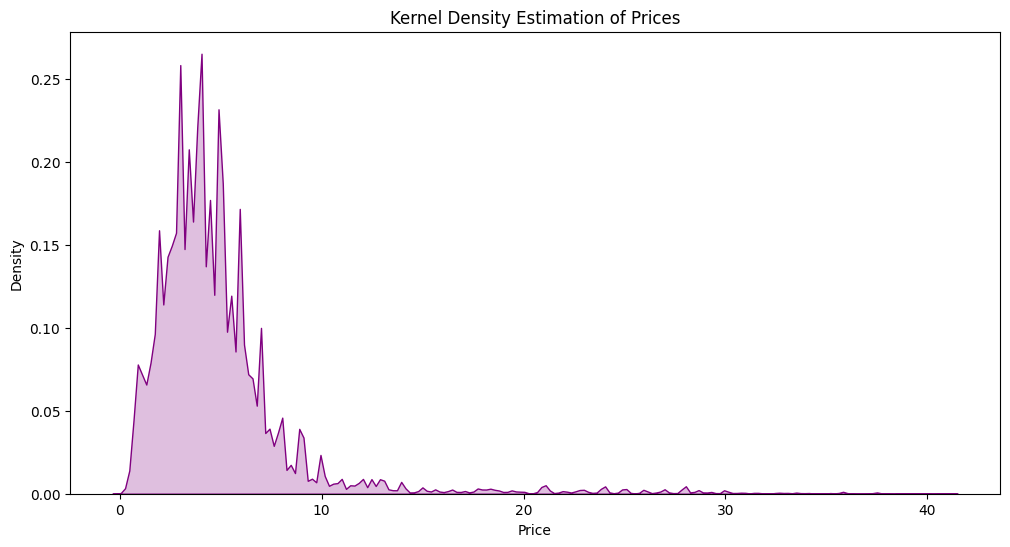

In [42]:
#Kernel Density Estimation
plt.figure(figsize=(12, 6))
sns.kdeplot(cleaned_df['current_price'], color='purple', fill=True)
plt.title('Kernel Density Estimation of Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

The graph shows a high concentration of prices in the low range, peaking before 10, which indicates that most products are priced relatively low. The density drops off sharply as prices increase, with very few products priced over 20. This pattern emphasizes a product range that is largely budget-oriented, with limited offerings in the higher price segment.

##### 2.2.4 Distribution of Current Price

**Distribution of Current Price per Company**

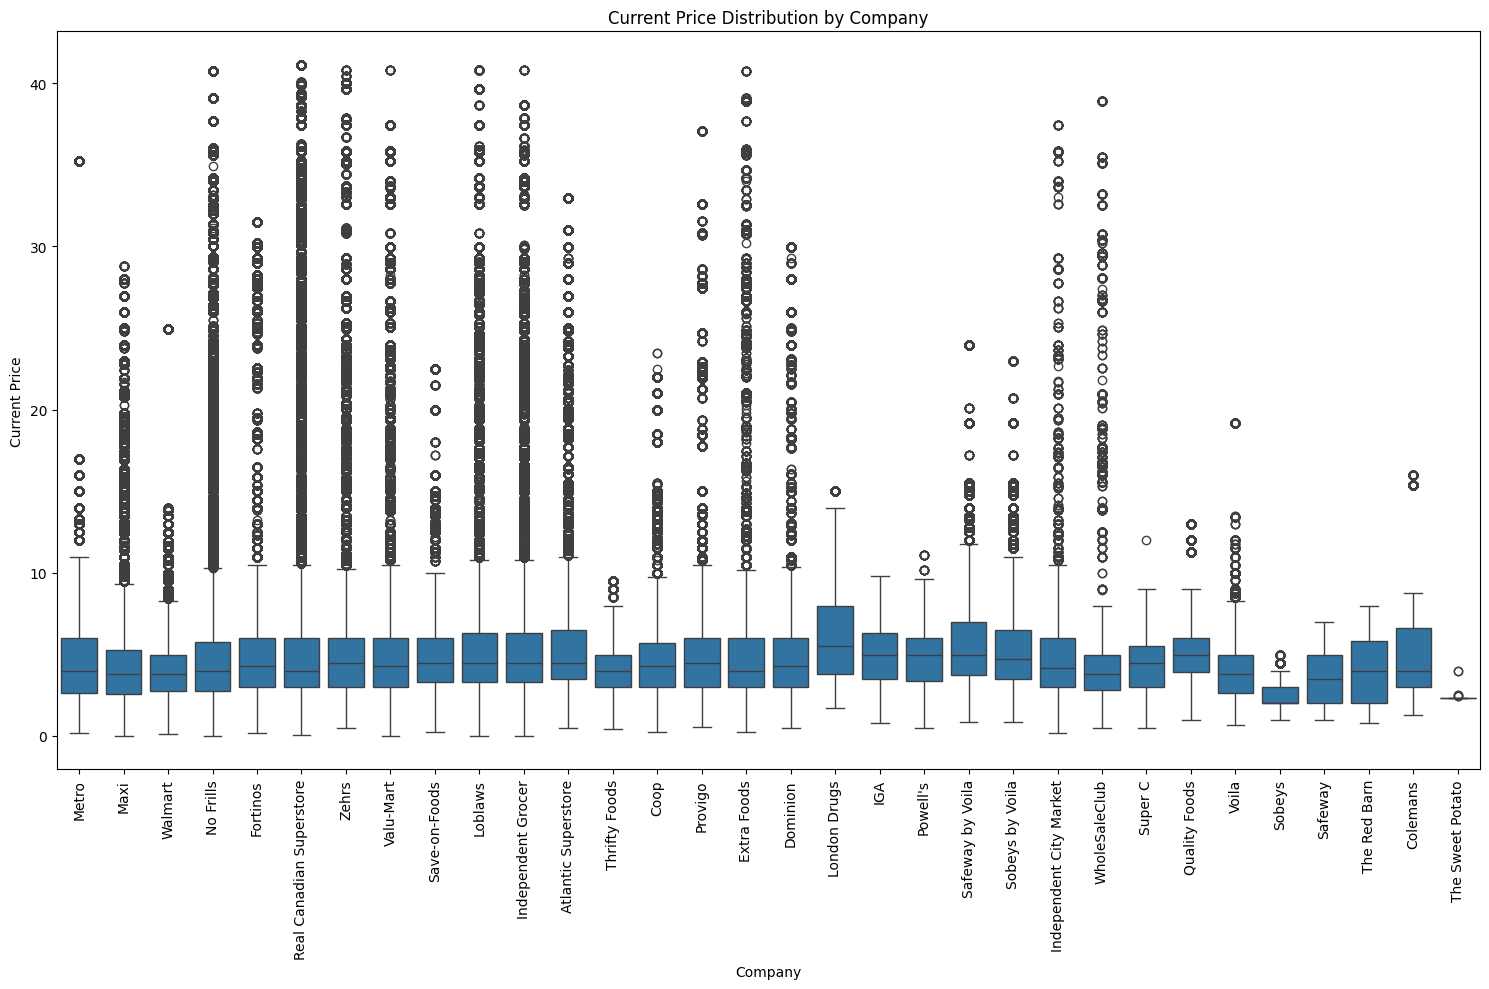

In [43]:
plt.figure(figsize=(15, 10))

sns.boxplot(x='company', 
            y='current_price', 
            data=cleaned_df
            )

plt.xticks(rotation=90)

plt.title('Current Price Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Current Price')

plt.tight_layout()
plt.show()

The boxplot reveals that while there is some variation in pricing among the companies, many have a similar range of prices. The presence of outliers across almost all companies suggests that each typically offers a few products priced well outside their general price range, likely to cater to niche markets or premium segments.

**Distribution of Current Price per Province**

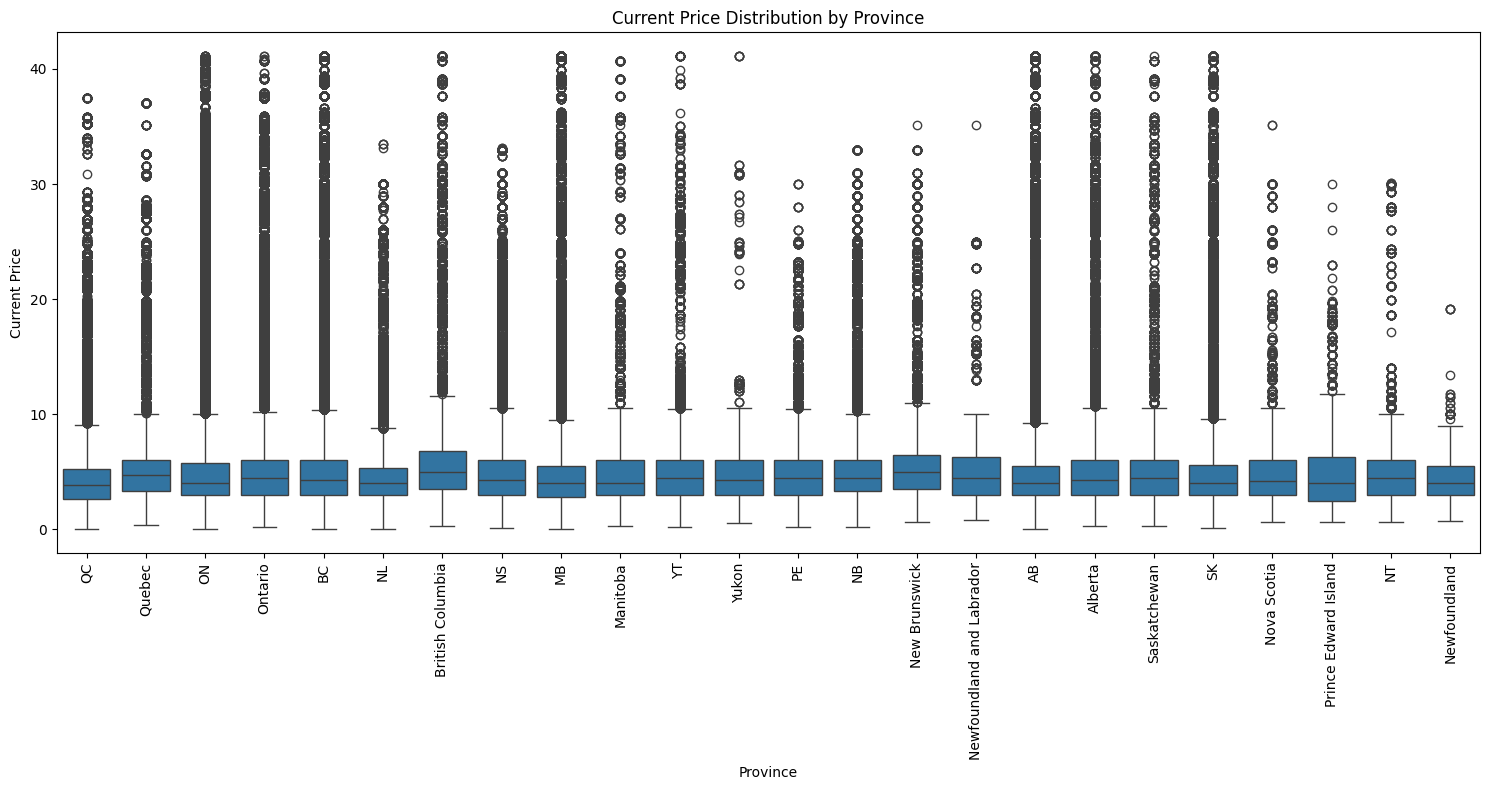

In [44]:
plt.figure(figsize=(15, 8))

sns.boxplot(x='province',
            y='current_price',
            data=cleaned_df
            )

plt.xticks(rotation=90)

plt.title('Current Price Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Current Price')

plt.tight_layout()
plt.show()

This boxplot suggests that, despite geographical differences, the central tendency of prices is comparable, but the range of prices reflects regional market differences.

**Distribution of Current Price per Category**

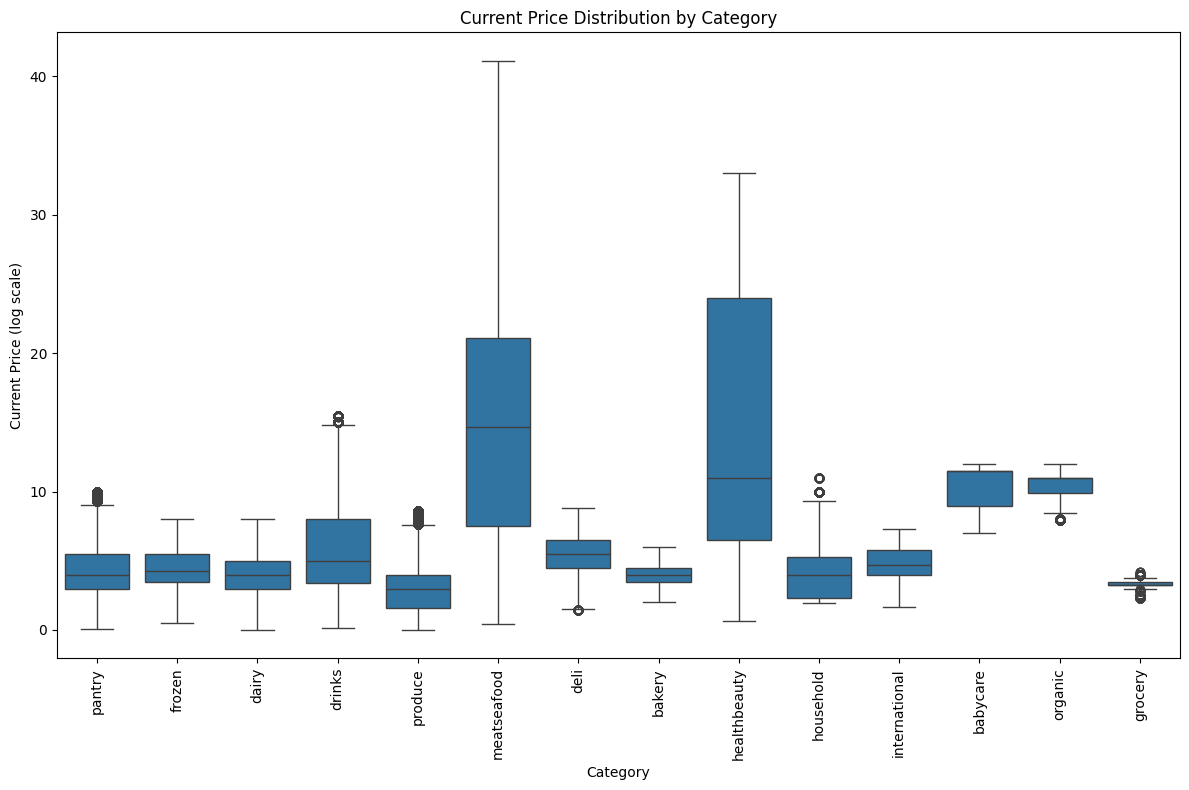

In [45]:
plt.figure(figsize=(12, 8))

sns.boxplot(x='category',
            y='current_price',
            data=cleaned_df
            )

plt.xticks(rotation=90)

plt.title('Current Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Current Price (log scale)')

plt.tight_layout()
plt.show()

The categories show varied price distributions, with some having a wider range indicating greater price diversity (such as meat/seafood and health/beauty), and others with a narrower range suggesting more consistent pricing (like grocery and organic). 

Notably, the meat/seafood and health/beauty categories have higher median prices and more high-priced outliers than other categories. In contrast, the grocery category has the lowest median price and fewer outliers, highlighting its position as the most budget-friendly option.

This information is valuable for understanding the pricing dynamics within each product category.

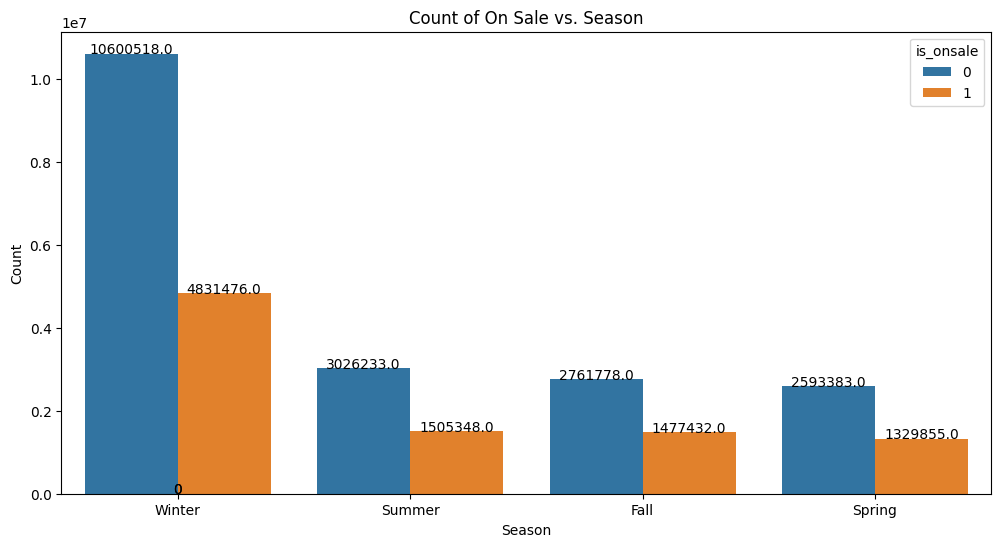

In [46]:
def month_to_season(month):
    if month in range(3, 5):
        return 'Spring'
    elif month in range(6, 8):
        return 'Summer'
    elif month in range(9, 11):
        return 'Fall'
    else:
        return 'Winter'

cleaned_df.loc[:, 'Season'] = cleaned_df['Month'].apply(month_to_season)

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Season', data=cleaned_df, hue='is_onsale')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Count of On Sale vs. Season')

plt.show()


The chart indicates that, regardless of the season, there are always more items not on sale than on sale. However, the difference between the two categories is most pronounced in Winter, suggesting that it might be an off-peak season for sales or promotions. Conversely, the smaller gap in Fall could indicate more aggressive sales strategies during that season.

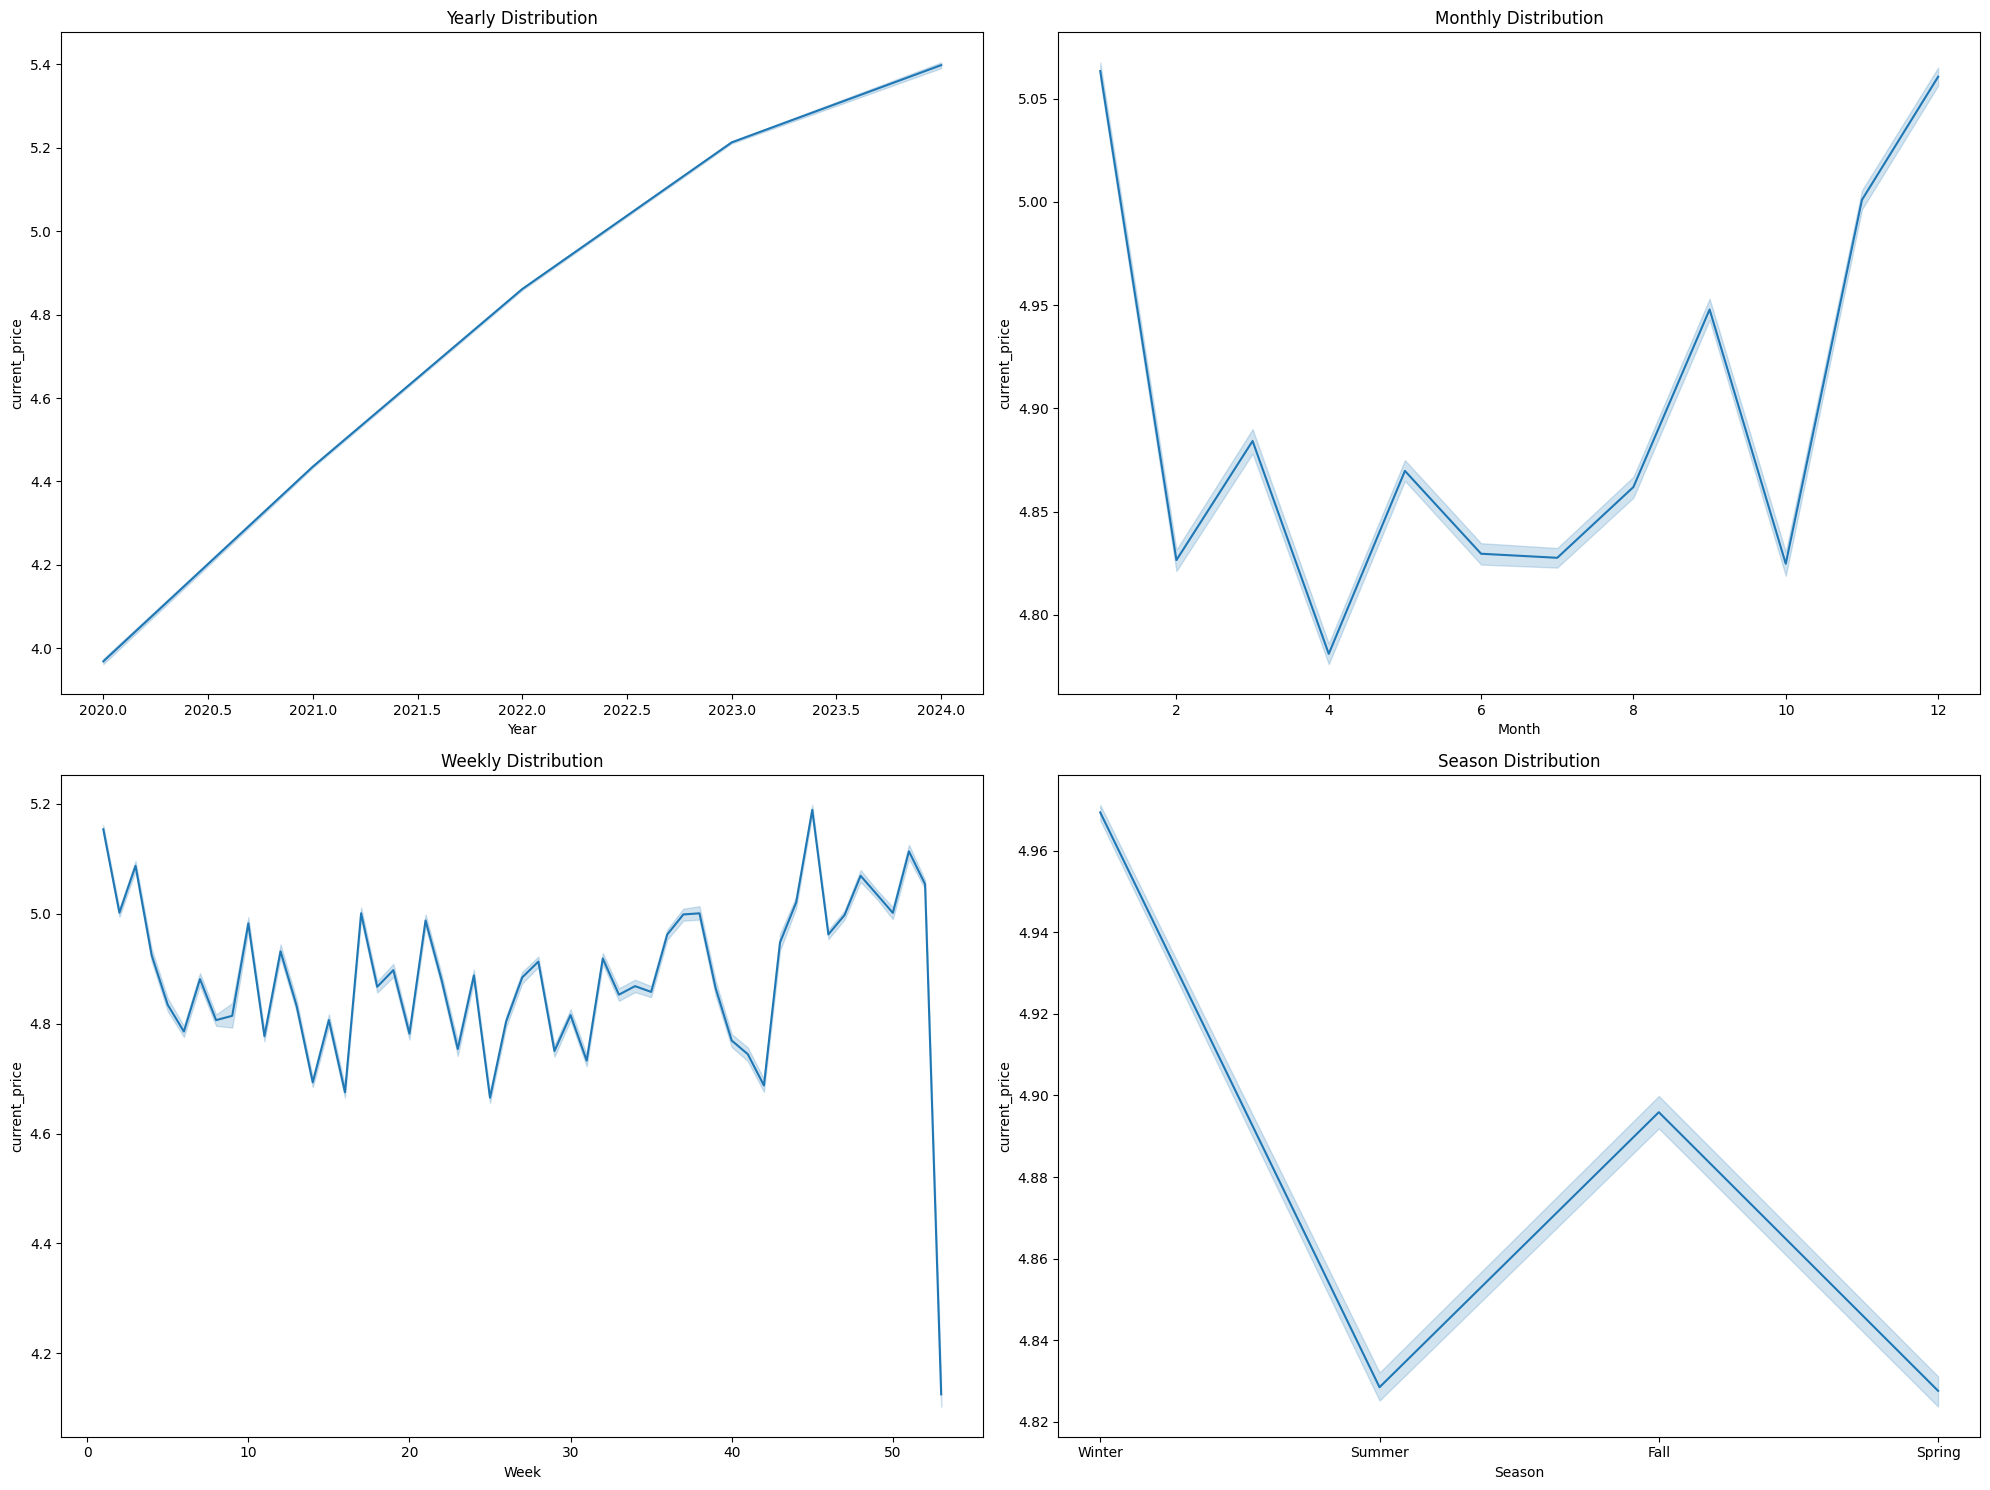

In [47]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2, figsize=(20, 15))
                                            
sns.lineplot(x = 'Year', y = 'current_price', data=cleaned_df, ax=ax1)
sns.lineplot(x = 'Month', y = 'current_price', data=cleaned_df, ax=ax2)
sns.lineplot(x = 'Week', y = 'current_price', data=cleaned_df, ax=ax3)
sns.lineplot(x = 'Season', y = 'current_price', data=cleaned_df, ax=ax4)

ax1.set_title('Yearly Distribution')
ax2.set_title('Monthly Distribution')
ax3.set_title('Weekly Distribution')
ax4.set_title('Season Distribution')

plt.tight_layout()
plt.show()

Yearly Distribution: This graph shows a general upward trend over the years from 2020 to 2024. It suggests that whatever is being measured (possibly prices, sales, etc.) is increasing over time.

Monthly Distribution: The data here fluctuates throughout the months, with noticeable dips and rises. There seems to be a pattern, possibly indicating seasonal effects on the data, with troughs and peaks at specific times of the year.

Weekly Distribution: This graph shows more volatility on a week-by-week basis, with several peaks and troughs indicating weekly variations in the data. There's no clear trend visible; instead, there are significant fluctuations from one week to another.

Season Distribution: Here, there's a pronounced dip in one season (labeled 'Summer'), followed by a sharp increase in the next season (labeled 'Fall'), and then it decreases again going into 'Spring'. This suggests that there is a significant seasonal impact on the data.

## 2.3 Detail Visualization
### Exploratory Data Analysis (EDA): 
#### We've chosen Save-on-Foods for the Exploratory Data Analysis (EDA):

In [48]:
cleaned_df['province'] = cleaned_df['province'].replace({'British Columbia': 'BC', 'Saskatchewan': 'SK'})

In [49]:
# Find all unique values in the 'company' column
unique_companies = cleaned_df['company'].unique()

# Print unique values
print("All unique companies:")
print(unique_companies)

All unique companies:
['Metro' 'Maxi' 'Walmart' 'No Frills' 'Fortinos'
 'Real Canadian Superstore' 'Zehrs' 'Valu-Mart' 'Save-on-Foods' 'Loblaws'
 'Independent Grocer' 'Atlantic Superstore' 'Thrifty Foods' 'Coop'
 'Provigo' 'Extra Foods' 'Dominion' 'London Drugs' 'IGA' "Powell's"
 'Safeway by Voila' 'Sobeys by Voila' 'Independent City Market'
 'WholeSaleClub' 'Super C' 'Quality Foods' 'Voila' 'Sobeys' 'Safeway'
 'The Red Barn' 'Colemans' 'The Sweet Potato']


In [50]:
# Filter out the data where 'company' column equals 'Save-on-Foods'
save_on_foods_data = cleaned_df[cleaned_df['company'] == 'Save-on-Foods']

# 1. Descriptive statistics
print("\nDescriptive statistics for Save-on-Foods data:")
print(save_on_foods_data.describe())



Descriptive statistics for Save-on-Foods data:
         product_id  product_matching_group_id  company_product_id  \
count  2.277093e+06               2.277093e+06        2.277093e+06   
mean   3.336866e+07               8.898958e+03        3.041777e+07   
min    1.882000e+03               3.400000e+01        1.882000e+03   
25%    6.367000e+03               1.033000e+03        6.367000e+03   
50%    1.013100e+04               6.960000e+03        1.010200e+04   
75%    5.462200e+05               1.586300e+04        4.460300e+05   
max    6.550063e+08               2.359500e+04        6.423720e+08   
std    9.137802e+07               7.809450e+03        8.804811e+07   

       standard_size_value                 collected_date      store_id  \
count         2.277093e+06                        2277093  2.277093e+06   
mean          2.662822e+02  2022-07-16 13:37:57.727318016  1.369344e+03   
min           0.000000e+00     2020-03-18 23:06:14.046000  4.080000e+02   
25%           6.00000

In [51]:
# Find all unique values in the 'company' column
unique_store = save_on_foods_data['store'].unique()

# Print unique values
print("All unique stores:")
print(unique_store)

All unique stores:
['Save On Foods - Willingdon' 'Save On Foods - Marine Way'
 'Save On Foods - White Rock' 'Save On Foods - River District'
 'Save On Foods - Guildford' 'Save On Foods - South Point'
 'Save On Foods - Fort And Foul Bay' 'Save On Foods - Duncan'
 'Save On Foods - Ladysmith' 'Save On Foods - Dewdney'
 'Save On Foods - Langley - Downtown' 'Save On Foods - Nordel Crossing'
 'Save On Foods - Columbia' 'Save On Foods - Country Club'
 'Save On Foods - Parksville' 'Save On Foods - Penticton'
 'Save On Foods - Terrace' 'Save On Foods - Ubc'
 'Save On Foods - Powell River' 'Save On Foods - Valleyview'
 'Save On Foods - Whitehorse' 'Save On Foods - Airdrie East'
 'Save On Foods - Airdrie West' 'Save On Foods - Mayfield'
 'Save On Foods - Stadium' 'Save On Foods - Hampton'
 'Save On Foods - Stoneycreek' 'Save On Foods - Thickwood'
 'Save On Foods - Magrath' 'Save On Foods - 50th Street Market'
 'Save On Foods - Grande Prairie' 'Save On Foods - Hunterhorn'
 'Save On Foods - Trinity

In [52]:

# Find all unique values in the 'company' column
unique_regular_price = save_on_foods_data['regular_price'].unique()

# Print unique values
print("All unique regular_price:")
print(unique_regular_price)

All unique regular_price:
[ 0.    4.99 10.99  3.79  3.29  2.29  4.59  4.79  4.49  5.49  9.99  6.49
  2.69  6.29  1.79  3.49  2.99  5.99  5.59  5.29 12.59  2.59  3.89  7.99
  4.29  9.49  3.99  8.99  4.69  8.49  2.49  6.79 11.99  4.19  3.69  2.39
  5.48  4.39  6.99  5.19  7.69  1.4  14.69  9.9   9.51  2.52  1.76  6.19]


/var/folders/z0/2cspyj5x1q5cg78m7gt_7cbm0000gn/T/ipykernel_68908/2349558679.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=save_on_foods_data_unique, y='province', palette='viridis')


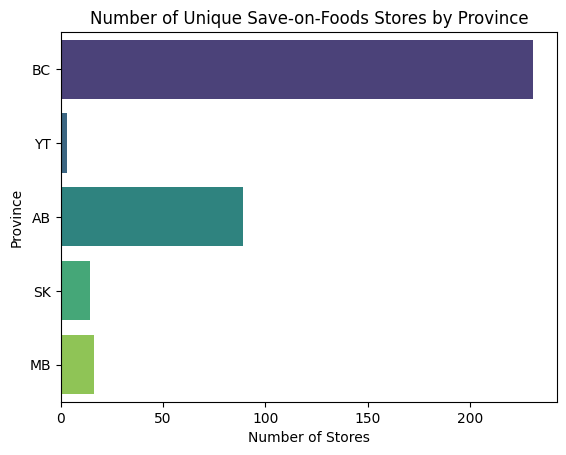

In [53]:

save_on_foods_data_unique = save_on_foods_data.drop_duplicates(subset=['store_id'])

# 2. Visualization

sns.countplot(data=save_on_foods_data_unique, y='province', palette='viridis')
plt.xlabel('Number of Stores')
plt.ylabel('Province')
plt.title('Number of Unique Save-on-Foods Stores by Province')
plt.show()


/var/folders/z0/2cspyj5x1q5cg78m7gt_7cbm0000gn/T/ipykernel_68908/1991953735.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=save_on_foods_data_unique, y='city', palette='viridis')


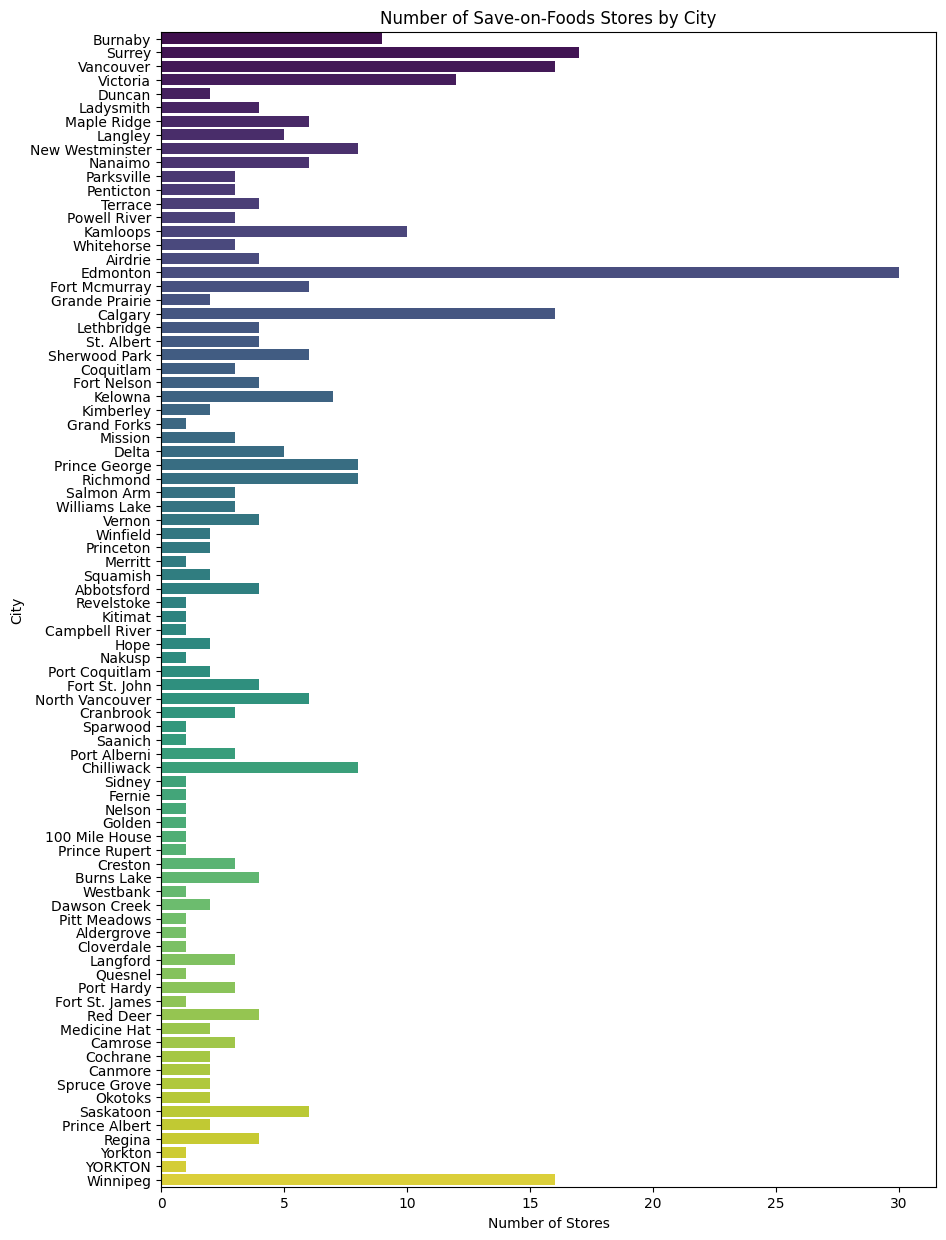

In [54]:

# Set the figure size
plt.figure(figsize=(10, 15))

# Create the count plot
sns.countplot(data=save_on_foods_data_unique, y='city', palette='viridis')

# Add labels and title
plt.xlabel('Number of Stores')
plt.ylabel('City')
plt.title('Number of Save-on-Foods Stores by City')

# Show the plot
plt.show()


Based on the analysis, it is evident that Save-on-Foods has the highest number of stores in the province of British Columbia (BC). However, upon closer examination at the city level, it is observed that the city of Edmonton has the highest number of stores, despite being located in the province of Alberta (AB).

This discrepancy suggests several potential factors for further analysis:
1. **Market Demand**: Edmonton, being the capital city of Alberta, might have a higher population density or stronger market demand for Save-on-Foods stores compared to other cities in BC.
  
2. **Competition**: The level of competition in the retail market could vary between provinces and cities. Factors such as the presence of competitors, market saturation, and consumer preferences may influence the distribution of Save-on-Foods stores.

3. **Expansion Strategy**: Save-on-Foods may have adopted a strategic expansion plan that prioritizes certain regions or cities over others. Factors such as infrastructure development, economic growth, and demographic trends may influence the selection of locations for new stores.

4. **Local Policies and Regulations**: Local policies, regulations, and zoning laws can also impact the establishment of retail outlets. Differences in municipal regulations between provinces may affect the ease of setting up stores in different cities.

5. **Consumer Behavior**: Variations in consumer behavior, lifestyle preferences, and shopping habits between provinces and cities could influence the demand for Save-on-Foods stores. Factors such as income levels, cultural diversity, and urbanization rates may play a role.

In conclusion, while Save-on-Foods demonstrates a strong presence in the province of British Columbia overall, the dominance of Edmonton in terms of the number of stores within the province of Alberta highlights the importance of considering local market dynamics and strategic factors in retail expansion decisions. Further analysis incorporating demographic, economic, and competitive factors may provide deeper insights into the observed patterns.

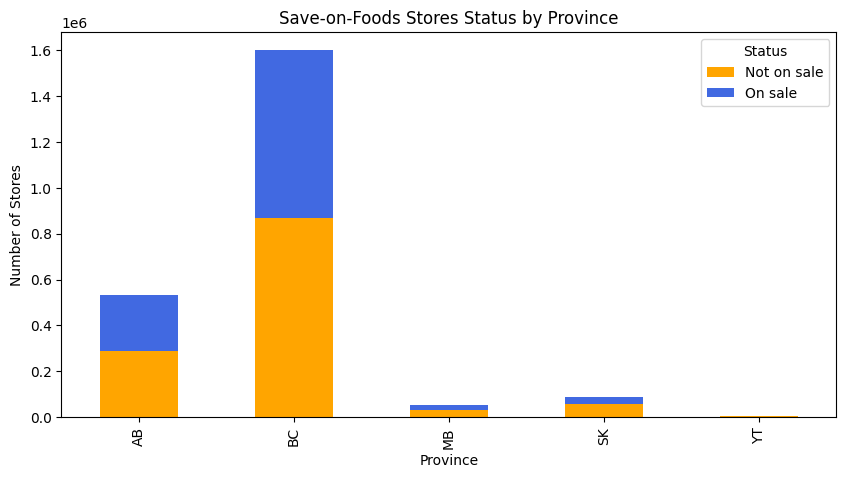

In [55]:


# Group by province and is_onsale, then count the occurrences
data_counts = save_on_foods_data.groupby(['province', 'is_onsale']).size().unstack()

# Plot with different colors for 'not on sale' and 'on sale'
data_counts.plot(kind='bar', stacked=True, figsize=(10, 5), color=['#FFA500', '#4169E1'])

plt.xlabel('Province')
plt.ylabel('Number of Stores')
plt.title('Save-on-Foods Stores Status by Province')
plt.legend(title='Status', labels=['Not on sale', 'On sale'])
plt.show()


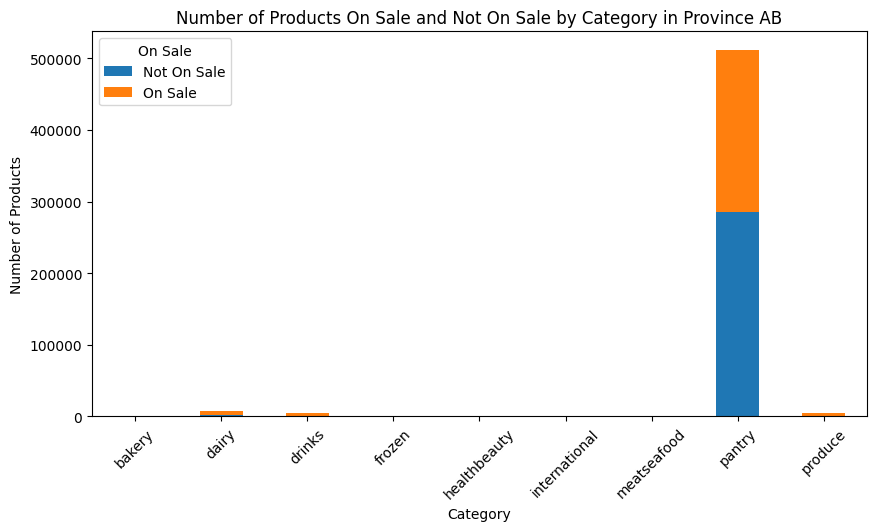

In [56]:
# Filter data for province 'AB'
province_AB_data = save_on_foods_data[save_on_foods_data['province'] == 'AB']

# Group by category and count the occurrences of 'is_onsale' for each category
category_sale_counts = province_AB_data.groupby('category')['is_onsale'].value_counts().unstack().fillna(0)

# Plotting the bar chart
category_sale_counts.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.title('Number of Products On Sale and Not On Sale by Category in Province AB')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='On Sale', labels=['Not On Sale', 'On Sale'])  # Add legend labels
plt.show()


Based on the analysis of the sales data, it's apparent that across all provinces, there are slightly more products not on sale compared to those on sale in Save-on-Foods stores. Furthermore, upon closer examination of the province of Alberta (AB), it is observed that the majority of products on sale fall under the 'Pantry' category, and the store inventory predominantly consists of pantry items.

This observation leads to several conclusions:

1. **Sales Strategy**: Save-on-Foods may employ a sales strategy that prioritizes offering discounts on specific categories of products, such as pantry items, to attract customers and drive sales. 

2. **Consumer Preferences**: The prevalence of pantry items on sale suggests that these products may be in higher demand among consumers, prompting the retailer to offer discounts to incentivize purchases.

3. **Inventory Composition**: The focus on pantry items in the sales promotions could reflect the composition of Save-on-Foods' inventory, indicating a strategic emphasis on stocking essential household goods.

4. **Profit Margins**: The higher proportion of non-sale items could indicate that non-discounted products contribute more significantly to the retailer's profit margins, leading to a deliberate balance between sales promotions and regular pricing strategies.

5. **Competitive Landscape**: The sales patterns observed in Alberta may also be influenced by the competitive landscape, consumer behavior, and local market dynamics specific to the province.

In summary, the analysis highlights the prevalence of pantry items on sale in Save-on-Foods stores across Alberta, suggesting a targeted sales approach aimed at meeting consumer demand while optimizing profitability. Understanding these sales trends can inform strategic decisions related to inventory management, pricing strategies, and customer engagement initiatives.

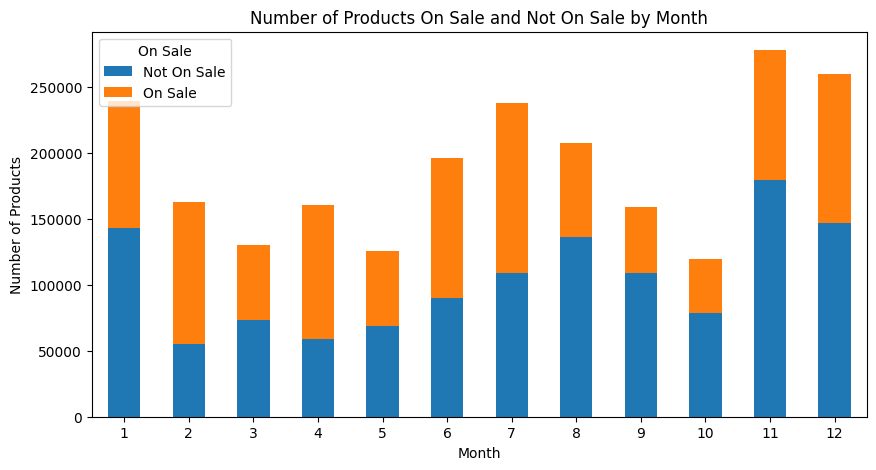

In [57]:


# Group by Month and count the occurrences of 'is_onsale' for each month
month_sale_counts = save_on_foods_data.groupby('Month')['is_onsale'].value_counts().unstack().fillna(0)

# Plotting the bar chart
ax = month_sale_counts.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel('Month')
plt.ylabel('Number of Products')
plt.title('Number of Products On Sale and Not On Sale by Month')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='On Sale', labels=['Not On Sale', 'On Sale'])  


In [58]:
# Count of transactions by Province
num_products_by_province = save_on_foods_data.groupby('province').size()


# Displaying the results
print("Count of num_products by Province:")
print(num_products_by_province)

Count of num_products by Province:
province
AB     530643
BC    1599743
MB      50629
SK      89749
YT       6329
dtype: int64


In [59]:
units_by_category = save_on_foods_data.groupby('category')['is_onsale'].aggregate(['sum','mean','median','count'])
units_by_category.head()

,sum,mean,median,count
category,,,,
bakery,2065,0.752277,1.0,2745
dairy,20676,0.716201,1.0,28869
deli,15,0.384615,0.0,39
drinks,12988,0.931507,1.0,13943
frozen,1238,0.784041,1.0,1579


Based on the analysis conducted:

1. **Seasonal Variation in Products on Sale**: The bar chart depicting the number of products on sale and not on sale by month reveals a seasonal pattern. Specifically, there is a higher number of products during the winter season, a significant decrease in products during the spring, and another peak during the summer.

2. **Num Counts by Province**: The transaction counts by province indicate that British Columbia (BC) has the highest number of transactions, followed by Alberta (AB). Manitoba (MB), Saskatchewan (SK), and Yukon (YT) have comparatively lower transaction counts.

3. **Units Sold by Category**: Upon further analysis, it is observed that the 'dairy' and 'drinks' categories have the highest total units sold, followed by 'bakery'. However, the 'deli' category has relatively lower units sold, suggesting potentially lower demand or availability for deli products.




#### Next task involves identifying all 34 potential retailers in Ontario, with a focus on major cities such as Toronto, Ottawa, Hamilton, Kitchener, London, Oshawa, and Windsor, listed in order of size, with additional insights on these retailers:


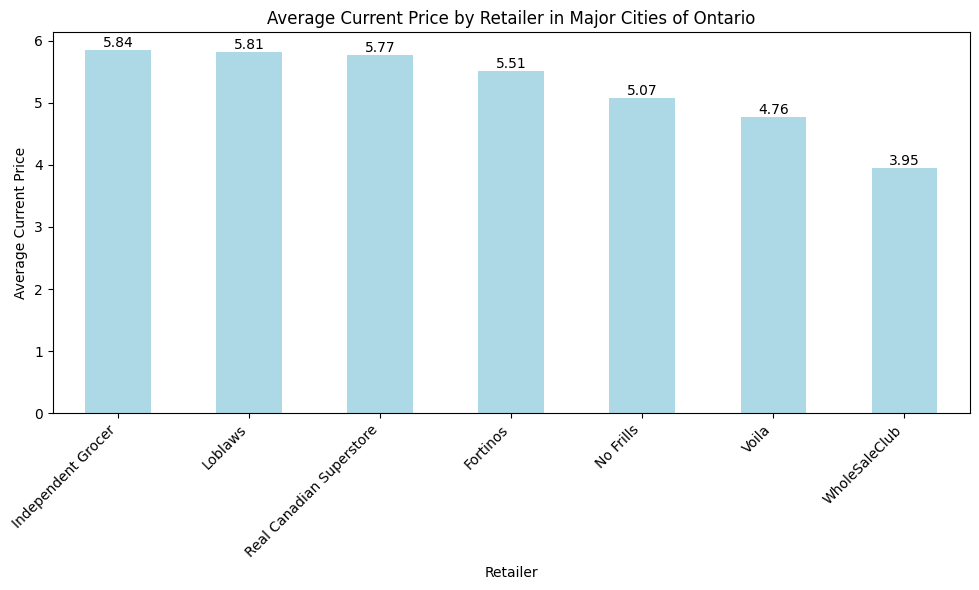

In [60]:

import matplotlib.pyplot as plt

# Select all retailers in Ontario from cleaned_df
ontario_retailers = cleaned_df[cleaned_df['province'] == 'Ontario']
   
# Define a list of major cities in Ontario
major_cities = ['Toronto', 'Ottawa', 'Hamilton', 'Kitchener', 'London', 'Oshawa', ' North York','Mississauga']

# Filter retailers located in major cities
ontario_retailers_in_major_cities = ontario_retailers[ontario_retailers['city'].isin(major_cities)]

# Group by company and calculate the average current price
retailers_avg_price = ontario_retailers_in_major_cities.groupby('company')['current_price'].mean().sort_values(ascending=False)

# Plot bar chart with numeric values on bars
plt.figure(figsize=(10, 6))
retailers_avg_price.plot(kind='bar', color='lightblue')
plt.title('Average Current Price by Retailer in Major Cities of Ontario')
plt.xlabel('Retailer')
plt.ylabel('Average Current Price')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(retailers_avg_price):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
plt.tight_layout()
plt.show()


In [61]:


# Calculate the number of unique companies per city
unique_companies_per_city = ontario_retailers.groupby('city')['company'].nunique().sort_values(ascending=False)

# Convert the series to a DataFrame for better display
unique_companies_table = pd.DataFrame(unique_companies_per_city).reset_index()
unique_companies_table.columns = ['City', 'Number of Unique Companies']

# Display the table
print(unique_companies_table.head(10))  # Display only the top ten cities


          City  Number of Unique Companies
0      Toronto                           5
1  Mississauga                           5
2       Ottawa                           4
3       London                           4
4   North York                           3
5    Etobicoke                           3
6     Kingston                           3
7     Hamilton                           3
8     Waterloo                           3
9       Whitby                           3


In [62]:
# Filter the dataset for Toronto
toronto_retailers = ontario_retailers[ontario_retailers['city'] == 'Toronto']

# Get the unique company name s in Toronto
unique_companies_in_toronto = toronto_retailers['company'].unique()

# Display the unique company names in Toronto
print(unique_companies_in_toronto)


['No Frills' 'Real Canadian Superstore' 'Loblaws' 'Independent Grocer'
 'Voila']


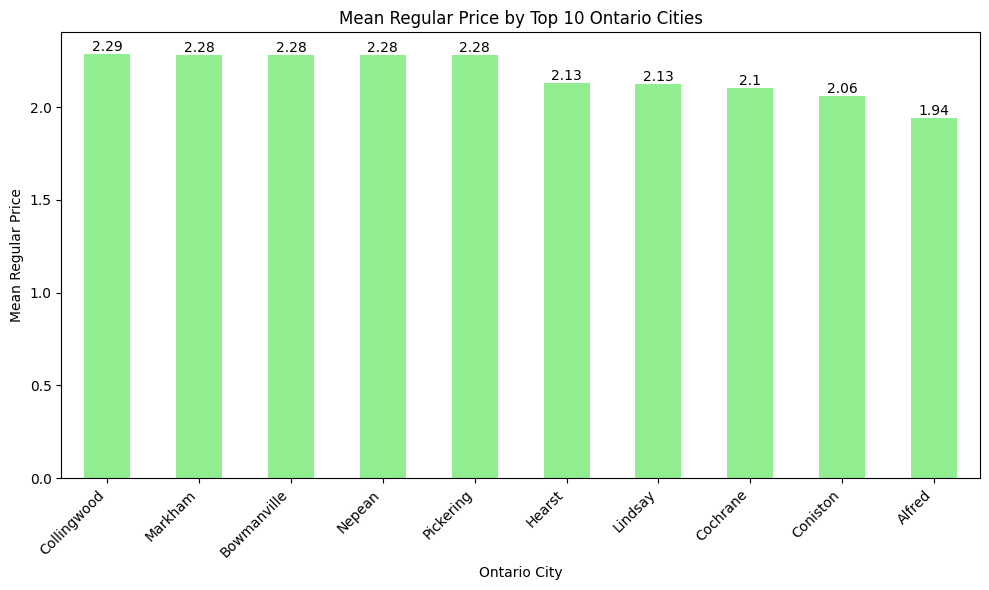

In [63]:
# Group by city and calculate the mean regular price
city_mean_regular_price = ontario_retailers.groupby('city')['regular_price'].mean().sort_values(ascending=False)

# Select only the top 10 cities with the highest mean regular prices
top_10_cities = city_mean_regular_price.head(10)

# Plot bar chart with numeric values on bars
plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar', color='lightgreen')
plt.title('Mean Regular Price by Top 10 Ontario Cities')
plt.xlabel('Ontario City')
plt.ylabel('Mean Regular Price')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_10_cities):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
plt.tight_layout()
plt.show()


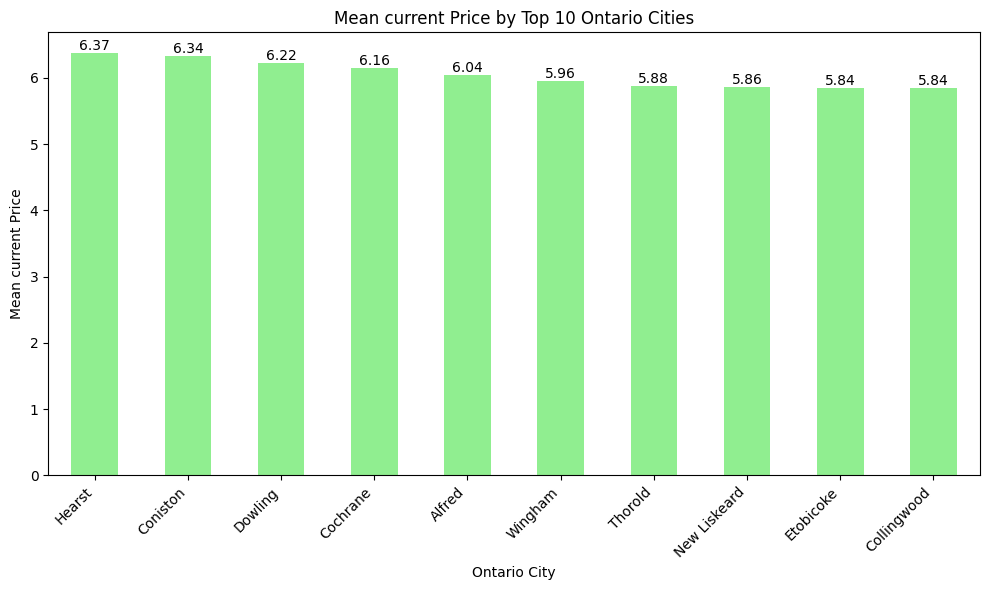

In [64]:
# Group by city and calculate the mean regular price
city_mean_regular_price = ontario_retailers.groupby('city')['current_price'].mean().sort_values(ascending=False)

# Select only the top 10 cities with the highest mean regular prices
top_10_cities = city_mean_regular_price.head(10)

# Plot bar chart with numeric values on bars
plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar', color='lightgreen')
plt.title('Mean current Price by Top 10 Ontario Cities')
plt.xlabel('Ontario City')
plt.ylabel('Mean current Price')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_10_cities):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
plt.tight_layout()
plt.show()


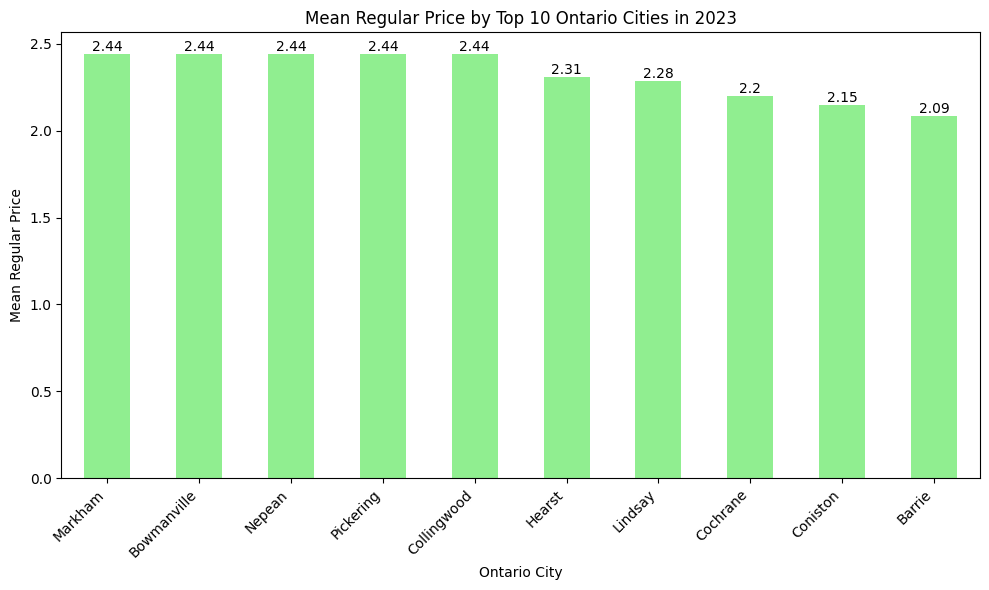

In [65]:
# Filter data for the year 2023
ontario_retailers_2023 = ontario_retailers[ontario_retailers['Year'] == 2023]

# Group by city and calculate the mean regular price for the year 2023
city_mean_regular_price_2023 = ontario_retailers_2023.groupby('city')['regular_price'].mean().sort_values(ascending=False)

# Select only the top 10 cities with the highest mean regular prices for the year 2023
top_10_cities_2023 = city_mean_regular_price_2023.head(10)

# Plot bar chart with numeric values on bars for the year 2023
plt.figure(figsize=(10, 6))
top_10_cities_2023.plot(kind='bar', color='lightgreen')
plt.title('Mean Regular Price by Top 10 Ontario Cities in 2023')
plt.xlabel('Ontario City')
plt.ylabel('Mean Regular Price')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_10_cities_2023):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
plt.tight_layout()
plt.show()


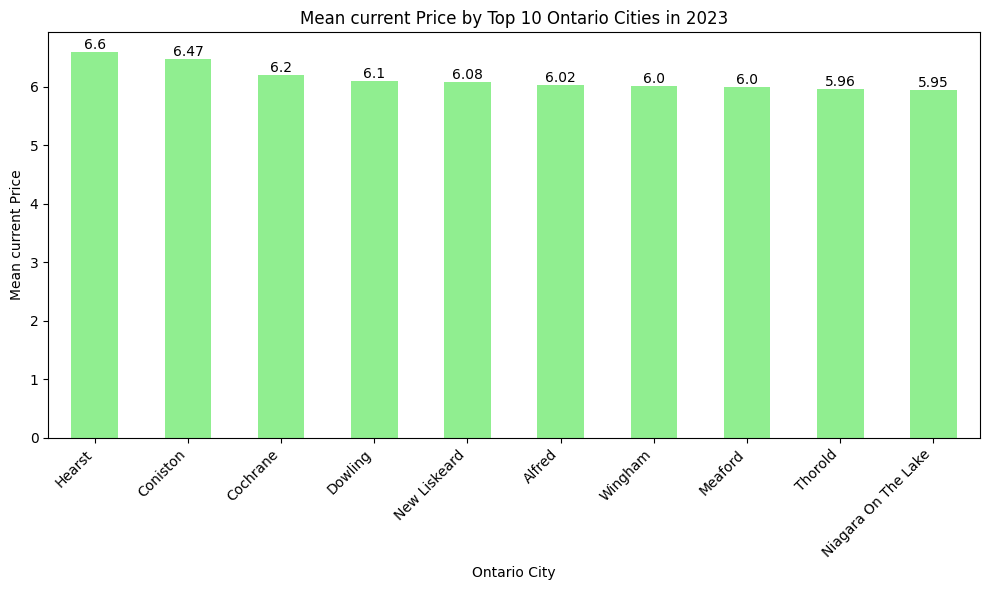

In [66]:

# Group by city and calculate the mean current price for the year 2023
city_mean_current_price_2023 = ontario_retailers_2023.groupby('city')['current_price'].mean().sort_values(ascending=False)

# Select only the top 10 cities with the highest mean regular prices for the year 2023
top_10_cities_2023 = city_mean_current_price_2023.head(10)

# Plot bar chart with numeric values on bars for the year 2023
plt.figure(figsize=(10, 6))
top_10_cities_2023.plot(kind='bar', color='lightgreen')
plt.title('Mean current Price by Top 10 Ontario Cities in 2023')
plt.xlabel('Ontario City')
plt.ylabel('Mean current Price')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_10_cities_2023):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')
plt.tight_layout()
plt.show()


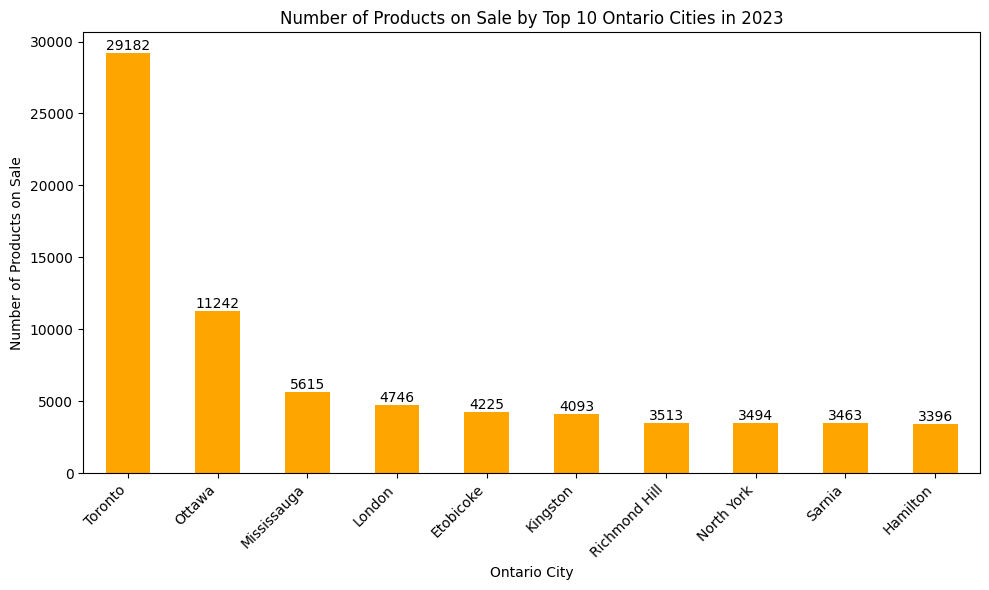

In [67]:
# Filter data for the year 2023
ontario_retailers_2023 = ontario_retailers[ontario_retailers['Year'] == 2023]

# Group by city and calculate the sum of products on sale for the year 2023
city_onsale_count_2023 = ontario_retailers_2023.groupby('city')['is_onsale'].sum().sort_values(ascending=False)

# Select only the top 10 cities with the highest number of products on sale for the year 2023
top_10_cities_onsale_2023 = city_onsale_count_2023.head(10)

# Plot bar chart with numeric values on bars for the year 2023
plt.figure(figsize=(10, 6))
top_10_cities_onsale_2023.plot(kind='bar', color='orange')
plt.title('Number of Products on Sale by Top 10 Ontario Cities in 2023')
plt.xlabel('Ontario City')
plt.ylabel('Number of Products on Sale')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_10_cities_onsale_2023):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()


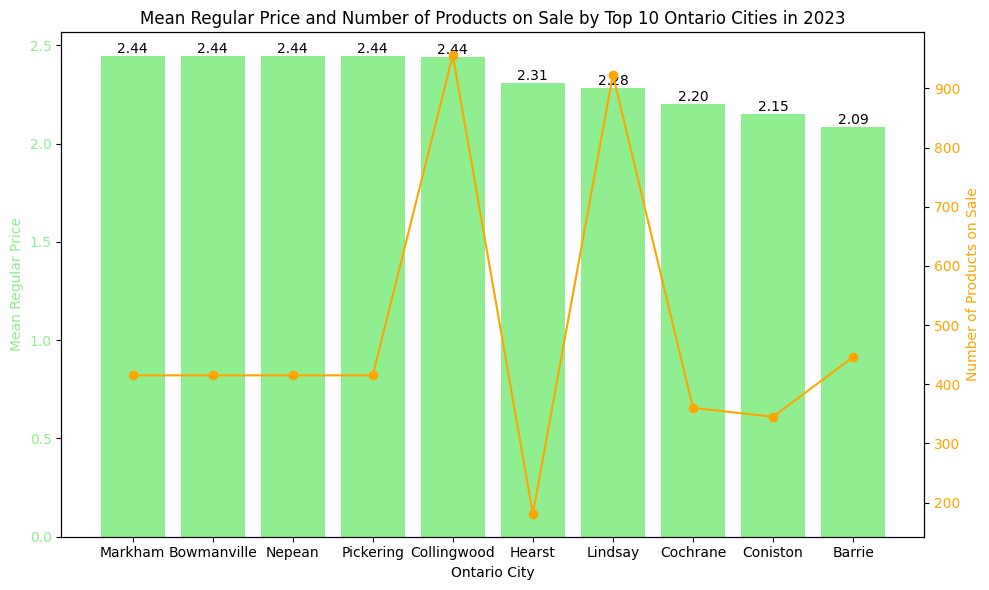

In [68]:


# Filter data for the year 2023
ontario_retailers_2023 = ontario_retailers[ontario_retailers['Year'] == 2023]

# Group by city and calculate the mean regular price and whether products are on sale for the year 2023
city_data_2023 = ontario_retailers_2023.groupby('city').agg({'regular_price': 'mean', 'is_onsale': 'sum'}).sort_values(by='regular_price', ascending=False)

# Select only the top 10 cities with the highest mean regular prices for the year 2023
top_10_cities_2023 = city_data_2023.head(10)

# Plot bar chart with numeric values on bars for the year 2023
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot mean regular price
color = 'lightgreen'
ax1.bar(top_10_cities_2023.index, top_10_cities_2023['regular_price'], color=color)
ax1.set_xlabel('Ontario City')
ax1.set_ylabel('Mean Regular Price', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Display mean regular price values on the bars
for i, v in enumerate(top_10_cities_2023['regular_price']):
    ax1.text(i, v, f'{v:.2f}', ha='center', va='bottom', color='black')

# Create a secondary y-axis to plot the number of products on sale
ax2 = ax1.twinx()
color = 'orange'
ax2.plot(top_10_cities_2023.index, top_10_cities_2023['is_onsale'], color=color, marker='o')
ax2.set_ylabel('Number of Products on Sale', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Mean Regular Price and Number of Products on Sale by Top 10 Ontario Cities in 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


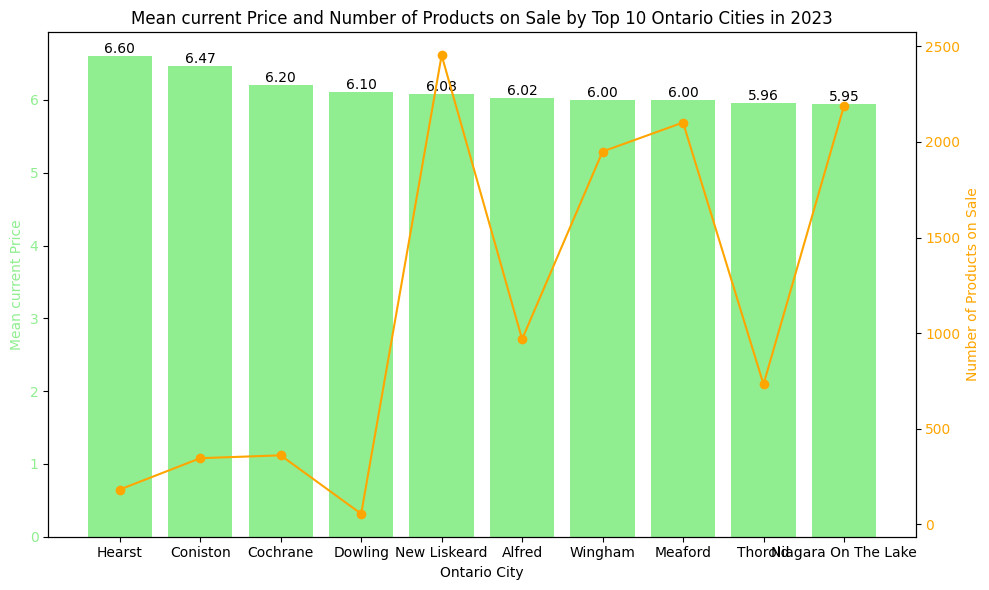

In [69]:

# Group by city and calculate the mean current price and whether products are on sale for the year 2023
city_data_2023 = ontario_retailers_2023.groupby('city').agg({'current_price': 'mean', 'is_onsale': 'sum'}).sort_values(by='current_price', ascending=False)

# Select only the top 10 cities with the highest mean regular prices for the year 2023
top_10_cities_2023 = city_data_2023.head(10)

# Plot bar chart with numeric values on bars for the year 2023
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot mean regular price
color = 'lightgreen'
ax1.bar(top_10_cities_2023.index, top_10_cities_2023['current_price'], color=color)
ax1.set_xlabel('Ontario City')
ax1.set_ylabel('Mean current Price', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Display mean regular price values on the bars
for i, v in enumerate(top_10_cities_2023['current_price']):
    ax1.text(i, v, f'{v:.2f}', ha='center', va='bottom', color='black')

# Create a secondary y-axis to plot the number of products on sale
ax2 = ax1.twinx()
color = 'orange'
ax2.plot(top_10_cities_2023.index, top_10_cities_2023['is_onsale'], color=color, marker='o')
ax2.set_ylabel('Number of Products on Sale', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Mean current Price and Number of Products on Sale by Top 10 Ontario Cities in 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
